# Setup
Run code here before anything else

In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor': "w"}
%load_ext autoreload
%autoreload 2

In [ ]:
# Setup
import sys

wd_path = "/home/dk538/rds/hpc-work/pico"
sys.path.append(wd_path)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from models.baselines import SingleGeneLasso, SingleGeneLinear, SingleGeneSVR

plt.style.use("default")
sns.set_theme(
    context="paper",
    style="ticks",
    palette="colorblind",
    rc={
        "axes.linewidth": 1,
        "xtick.major.width": 1,
        "ytick.major.width": 1,
        "axes.edgecolor": "grey",
        "xtick.labelcolor": "black",
        "xtick.color": "grey",
        "ytick.labelcolor": "black",
        "ytick.color": "grey",
    },
)

import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
import urllib.request

# Download the font
font_url = "https://github.com/adobe-fonts/source-sans/blob/release/TTF/SourceSans3-Regular.ttf?raw=True"
font_path = f"{wd_path}/results_analysis/figures/SourceSans3-Regular.ttf"  # Specify where to save the font
font_bold_url = "https://github.com/adobe-fonts/source-sans/blob/release/TTF/SourceSans3-Bold.ttf?raw=True"
font_bold_path = f"{wd_path}/results_analysis/figures/SourceSans3-Bold.ttf"  # Specify where to save the font
font_it_url = "https://github.com/adobe-fonts/source-sans/blob/release/TTF/SourceSans3-It.ttf?raw=True"
font_it_path = f"{wd_path}/results_analysis/figures/SourceSans3-It.ttf"  # Specify where to save the font
urllib.request.urlretrieve(font_url, font_path)
urllib.request.urlretrieve(font_bold_url, font_bold_path)
urllib.request.urlretrieve(font_it_url, font_it_path)

# in a terminal, run
# cp ~/rds/hpc-work/graphdep/results_analysis/figures/*ttf ~/.local/share/fonts
# fc-cache -f -v
# rm -fr ~/.cache/matplotlib

# Then restart Jupyter kernel

fm.findfont("Source Sans 3", rebuild_if_missing=True)
# fm.findfont("Source Sans 3:style=italic", rebuild_if_missing=True)

# Set font globally for Matplotlib
from matplotlib import rc

plt.style.use("default")
sns.set_theme(
    context="paper",
    style="ticks",
    palette="colorblind",
    rc={
        "axes.linewidth": 1,
        "xtick.major.width": 1,
        "ytick.major.width": 1,
        "axes.edgecolor": "grey",
        "xtick.labelcolor": "black",
        "xtick.color": "grey",
        "ytick.labelcolor": "black",
        "ytick.color": "grey",
    },
)

rc("font", **{"family": "sans-serif", "sans-serif": ["Source Sans 3"]})
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.it"] = "Source Sans 3:italic"

/home/dk538/.conda/envs/slurm-torch-2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 5 SCAN-B model with TCGA external validation

### 5.0.1 Data summaries

In [3]:
from utils.data_utils import process_data, Manual

x, s, c, y, test_samples = process_data(
    dataset="depmap_gdsc_scanb_tcga", wd_path=wd_path, experiment="tcga"
)

/home/dk538/.conda/envs/slurm-torch-2/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Number of shared features in x: 18722


/home/dk538/rds/hpc-work/graphdep/utils/data_utils.py:4382: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  meta_tcga["ER"] = meta_tcga["ER_STATUS_BY_IHC"].map({"Positive": 1, "Negative": 0, "Indeterminate": 0, "[Not Available]": np.nan})
/home/dk538/rds/hpc-work/graphdep/utils/data_utils.py:4383: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  meta_tcga["PR"] = meta_tcga["PR_STATUS_BY_IHC"].map({"Positive": 1, "Negative": 0, "Indeterminate": 0, "[Not Available]": np.nan})
/home/dk538/rds/hpc-work/graphdep/utils/data_utils.py:4385: 

In [4]:
dataset = Manual(
    x=x,
    s=s,
    y=y,
    c=c,
    constraints=[
        "MCL1",
        "PSMC1",
        "FANCF",
        "RAD1",
        "PPM1D",
        "SMU1",
        "HSPA14",
        "GBF1",
        "MDM4",
        "KNTC1",
        "LRWD1",
        "CEP97",
        "ERBB2",
        "ERBB3",
        "EGFR",
        "PIK3CA",
    ],
    target="BCFi_5Y",
    confounders=["AGE", "ER", "HER2", "LN", "SIZE"],
    params={"var_filt_x": 1.0, "var_filt_s": None},
)

0
0
500
1334

Dataset created:                   
--------------------------------------------------
Data type                          Size
--------------------------------------------------
x                                  (8959, 5137)
s                                  (8959, 16)
y                                  (8959, 1)
c                                  (8959, 5)
--------------------------------------------------


In [7]:
x_depmap = dataset.x_s_y.loc[
    dataset.x_s_y.index.str.startswith("ACH"), dataset.x_s_y.columns.str.endswith("_x")
]
x_tcga = dataset.x_s_y.loc[
    dataset.x_s_y.index.str.startswith("TCGA"), dataset.x_s_y.columns.str.endswith("_x")
]
x_scanb = dataset.x_s_y.loc[
    dataset.x_s_y.index.str.startswith("S"), dataset.x_s_y.columns.str.endswith("_x")
]

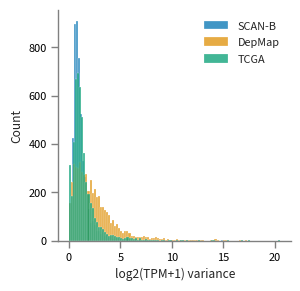

In [8]:
# Variance in gene expression in each set
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sns.histplot(data=x_scanb.var(), ax=ax, label="SCAN-B", binwidth=0.2)
sns.histplot(data=x_depmap.var(), ax=ax, label="DepMap", binwidth=0.2)
sns.histplot(data=x_tcga.var(), ax=ax, label="TCGA", binwidth=0.2)
sns.despine(ax=ax)
ax.set_xlabel("log2(TPM+1) variance")
ax.legend(frameon=False)

plt.savefig(
    f"{wd_path}/results_analysis/figures/scanb/feature_var.png",
    dpi=1200,
    bbox_inches="tight",
)
plt.savefig(
    f"{wd_path}/results_analysis/figures/scanb/feature_var.svg", bbox_inches="tight"
)

# Depmap has more higher variance genes, but this represents a larger number of cancer types, so this is to be expected

In [9]:
c_depmap = dataset.x_s_y.loc[
    dataset.x_s_y.index.str.startswith("ACH"), dataset.x_s_y.columns.str.endswith("_c")
]
c_depmap["dataset"] = "DepMap"
c_tcga = dataset.x_s_y.loc[
    dataset.x_s_y.index.str.startswith("TCGA"), dataset.x_s_y.columns.str.endswith("_c")
]
c_tcga["dataset"] = "TCGA"
c_scanb = dataset.x_s_y.loc[
    dataset.x_s_y.index.str.startswith("S"), dataset.x_s_y.columns.str.endswith("_c")
]
c_scanb["dataset"] = "SCANB"

c_merged = pd.concat([c_scanb, c_tcga], axis=0)

dataset  AGE_c
SCANB    70.0     1092
         65.0      855
         75.0      791
         60.0      642
         50.0      628
                  ... 
TCGA     27.0        1
         28.0        1
         30.0        1
         32.0        1
         87.0        1
Name: AGE_c, Length: 78, dtype: int64
dataset  ER_c
SCANB    1.0     5427
         0.0      849
TCGA     1.0      654
         0.0      195
Name: ER_c, dtype: int64
dataset  HER2_c
SCANB    0.0       5520
         1.0        756
TCGA     0.0        682
         1.0        167
Name: HER2_c, dtype: int64
dataset  LN_c
SCANB    0.0     4050
         1.0     2226
TCGA     0.0      473
         1.0      376
Name: LN_c, dtype: int64
dataset  SIZE_c
SCANB    0.0       4160
         1.0       2116
TCGA     1.0        648
         0.0        201
Name: SIZE_c, dtype: int64
dataset  dataset
SCANB    SCANB      6660
TCGA     TCGA        849
Name: dataset, dtype: int64


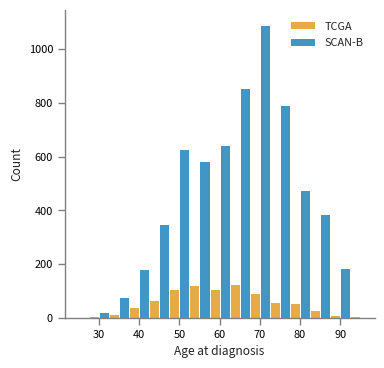

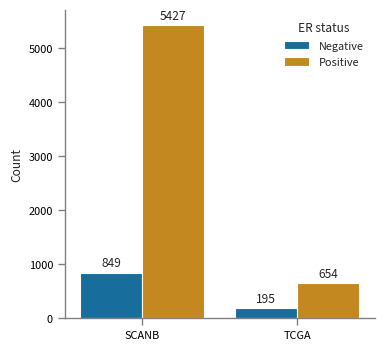

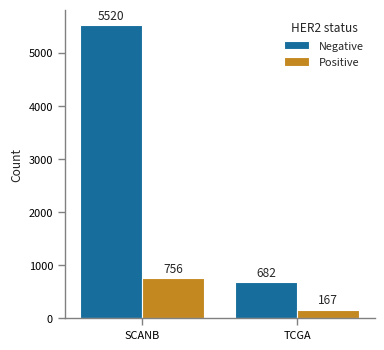

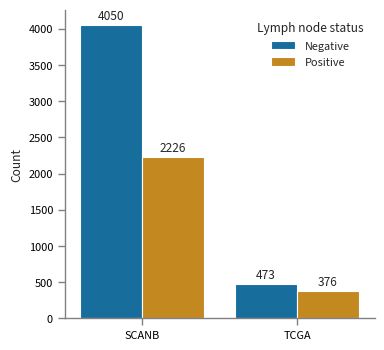

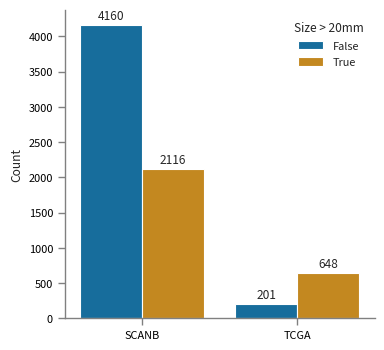

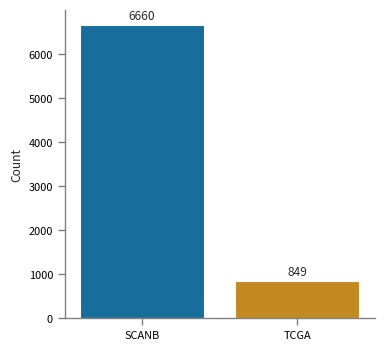

In [10]:
# Histogram of clinical variables for each cancer type
confounder_map = {
    "AGE_c": "Age at diagnosis",
    "ER_c": "ER status",
    "HER2_c": "HER2 status",
    "LN_c": "Lymph node status",
    "SIZE_c": "Size > 20mm",
    "dataset": "Dataset",
}
for col in c_scanb.columns:
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    if col == "AGE_c":
        sns.histplot(
            data=c_merged, x=col, hue="dataset", ax=ax, multiple="dodge", binwidth=5
        )
    else:
        sns.countplot(data=c_merged, x="dataset", hue=col, ax=ax)

    print(c_merged.groupby("dataset")[col].value_counts())
    sns.despine(ax=ax)

    # ax.legend(frameon=False)
    ax.set_ylabel("Count")
    ax.set_xlabel("")

    # Add value counts as labels
    if col != "AGE_c":
        for container in ax.containers:
            labels = [
                f"{int(bar.get_height())}" if bar.get_height() > 0 else ""
                for bar in container
            ]
            ax.bar_label(container, labels=labels, label_type="edge", padding=2)

    if col not in ["SIZE_c", "AGE_c", "dataset"]:
        ax.legend(
            frameon=False, title=confounder_map[col], labels=["Negative", "Positive"]
        )
    if col == "SIZE_c":
        ax.legend(frameon=False, title=confounder_map[col], labels=["False", "True"])
    if col == "AGE_c":
        ax.set_xlabel("Age at diagnosis")
        ax.legend(frameon=False, title="", labels=["TCGA", "SCAN-B"])

    plt.savefig(
        f"{wd_path}/results_analysis/figures/scanb/feat_hist_{col}.png",
        dpi=1200,
        bbox_inches="tight",
    )
    plt.savefig(
        f"{wd_path}/results_analysis/figures/scanb/feat_hist_{col}.svg",
        bbox_inches="tight",
    )

In [11]:
y_depmap = dataset.x_s_y.loc[
    dataset.x_s_y.index.str.startswith("ACH"), dataset.x_s_y.columns.str.endswith("_y")
]
y_depmap["dataset"] = "DepMap"
y_tcga = dataset.x_s_y.loc[
    dataset.x_s_y.index.str.startswith("TCGA"), dataset.x_s_y.columns.str.endswith("_y")
]
y_tcga["dataset"] = "TCGA"
y_scanb = dataset.x_s_y.loc[
    dataset.x_s_y.index.str.startswith("S"), dataset.x_s_y.columns.str.endswith("_y")
]
y_scanb["dataset"] = "SCAN-B"

y_merged = pd.concat([y_scanb, y_tcga], axis=0)

dataset  BCFI_5Y_y
SCAN-B   False        2222
         True          257
TCGA     False         187
         True           61
dtype: int64


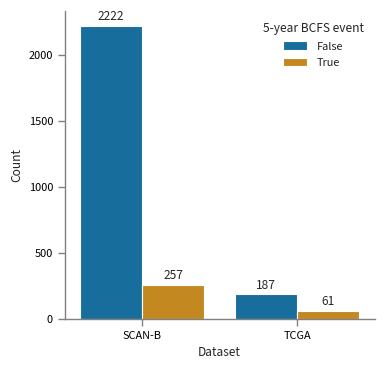

In [ ]:
# Number of events for each dataset

event = "BCFI_5Y_y"

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.countplot(data=y_merged, x="dataset", hue=event, ax=ax)  # , binwidth=0.2)
sns.despine(ax=ax)
ax.set_xlabel("Dataset")
ax.set_ylabel("Count")
# Add value counts as labels
if col != "AGE_c":
    for container in ax.containers:
        labels = [
            f"{int(bar.get_height())}" if bar.get_height() > 0 else ""
            for bar in container
        ]
        ax.bar_label(container, labels=labels, label_type="edge", padding=2)


print(y_merged.groupby("dataset").value_counts())
ax.legend(frameon=False, title="5-year BCFS event")

plt.savefig(
    f"{wd_path}/results_analysis/figures/scanb/feat_hist_{event}.png",
    dpi=1200,
    bbox_inches="tight",
)
plt.savefig(
    f"{wd_path}/results_analysis/figures/scanb/feat_hist_{event}.svg",
    bbox_inches="tight",
)

In [13]:
print(y_tcga["BCFI_5Y_y"].index[y_tcga["BCFI_5Y_y"].index.duplicated()])
print(y_scanb["BCFI_5Y_y"].index[y_scanb["BCFI_5Y_y"].index.duplicated()])

Index([], dtype='object')
Index([], dtype='object')


## 5.1 Outcome prediction (classification)

In [5]:
target = "BCFi_5Y"
experiment = "tcga"
rep_types = {"vae": "VAE", "icovae_MCL1_16": "PiCo"}
model_types = ["LogisticRegression"]
feat_sets = {"Rep": "", "Clinical+Rep": "_AGE_5", "Clinical": "_AGE_5_norep"}
feat_sets_conf = {
    "Rep": [],
    "Clinical+Rep": ["AGE", "ER", "HER2", "LN", "SIZE"],
    "Clinical": ["AGE", "ER", "HER2", "LN", "SIZE"],
}
# Mapping for feature names in plots
names_map = {
    "AGE": "Age at diagnosis",
    "ER": "ER status",
    "HER2": "HER2 status",
    "LN": "LN involvement",
    "SIZE": "Size >20mm",
}

{'target': 'BCFi_5Y', 'dataset': 'depmap_gdsc_scanb_tcga', 'enc': 'iCoVAE', 'reg': 'LogisticRegression', 'constraints': ['MCL1', 'PSMC1', 'FANCF', 'RAD1', 'PPM1D', 'SMU1', 'HSPA14', 'GBF1', 'MDM4', 'KNTC1', 'LRWD1', 'CEP97', 'ERBB2', 'ERBB3', 'EGFR', 'PIK3CA'], 'confounders': None, 'seed': 10, 'data_dir': './data', 'norm': False, 'lindec': False, 'filt': 'uni_var', 'experiment': 'tcga', 'cuda': False, 'norep': False, 'newstudy': False, 'enc_path': '/home/dk538/rds/hpc-work/graphdep/data/outputs/depmap_gdsc_scanb_tcga/BCFi_5Y/tcga/icovae_MCL1_16', 'test_samples': ['TCGA-3C-AALI', 'TCGA-3C-AALJ', 'TCGA-3C-AALK', 'TCGA-4H-AAAK', 'TCGA-5T-A9QA', 'TCGA-A1-A0SB', 'TCGA-A1-A0SD', 'TCGA-A1-A0SE', 'TCGA-A1-A0SF', 'TCGA-A1-A0SG', 'TCGA-A1-A0SH', 'TCGA-A1-A0SI', 'TCGA-A1-A0SJ', 'TCGA-A1-A0SK', 'TCGA-A1-A0SM', 'TCGA-A1-A0SN', 'TCGA-A1-A0SO', 'TCGA-A1-A0SQ', 'TCGA-A2-A04N', 'TCGA-A2-A04P', 'TCGA-A2-A04T', 'TCGA-A2-A04U', 'TCGA-A2-A04V', 'TCGA-A2-A04W', 'TCGA-A2-A04X', 'TCGA-A2-A04Y', 'TCGA-A2-A0CK'

,rep_type,model_type,feat_sets,dataset,Unnamed: 0,test_cross_entropy,test_f1,test_aupr,test_auroc,seed
0,PiCo,LogisticRegression,Clinical,test,0.0,0.793385,0.408696,0.331975,0.589182,55.0
1,PiCo,LogisticRegression,Clinical+Rep,test,0.0,0.990820,0.400442,0.332342,0.599150,55.0
2,PiCo,LogisticRegression,Rep,test,0.0,0.942267,0.403182,0.292533,0.587534,55.0
3,VAE,LogisticRegression,Clinical,test,0.0,0.793385,0.408696,0.331975,0.589182,55.0
4,VAE,LogisticRegression,Clinical+Rep,test,0.0,1.008726,0.397477,0.323443,0.585246,55.0
5,VAE,LogisticRegression,Rep,test,0.0,0.966400,0.391596,0.289843,0.576436,55.0


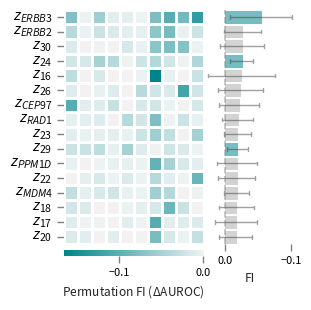

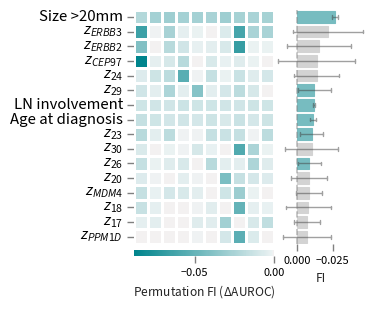

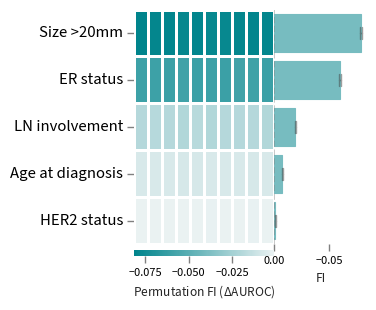

In [44]:
# LOAD TEST SET RESULTS
from utils.comp_utils import calculate_feat_imps, plot_feat_imps_v2

res_root = f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/{target}/{experiment}/pico"
seeds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

test_metrics_df = None
hopt_df = None

train = True


for feat_set, ext in feat_sets.items():
    for rep_type, rep_type_label in rep_types.items():
        for model_type in model_types:
            if rep_type_label == "PiCo":
                # try:
                pred_dict_list, constraints, confounders, feat_imps_df = (
                    calculate_feat_imps(
                        enc=rep_type,
                        reg=model_type,
                        model_path=f"{res_root}/{model_type}_{rep_type + ext}",
                        target=target,
                        seeds=seeds,
                        train=train,
                    )
                )
                if feat_set in ["Clinical"]:
                    zdim = 0
                    norep = True
                else:
                    zdim = 64
                    norep = False

                plot_feat_imps_v2(
                    feat_imps_df,
                    target=target,
                    constraints=constraints,
                    confounders=feat_sets_conf[feat_set],
                    zdim=zdim,
                    enc=rep_type,
                    reg=model_type,
                    experiment=experiment,
                    names_map=names_map,
                    metric="auroc",
                    norep=norep,
                    sort_feats=True,
                    top_k=16,
                    save_path=f"{model_type}_{target}_auroc_{rep_type + ext}_{train}",
                )
            # except:
            # print(f"Cannot produce feat imp plot for {model_type}, {rep_type}, {ext}...")
            for seed in seeds:
                try:
                    best_trial = pd.read_csv(
                        f"{res_root}/{model_type}_{rep_type + ext}/opt_study_results_s{seed}.csv"
                    ).sort_values("value", ascending=False)["number"][0]
                    curr_hopt_df = pd.read_csv(
                        f"{res_root}/{model_type}_{rep_type + ext}/cv_results_{best_trial}_s{seed}.csv"
                    )

                    curr_test_metrics_df = pd.read_csv(
                        f"{res_root}/{model_type}_{rep_type + ext}/test_metrics_s{seed}.csv"
                    )
                    curr_test_metrics_df["rep_type"] = rep_type_label
                    curr_test_metrics_df["model_type"] = model_type
                    curr_hopt_df["rep_type"] = rep_type_label
                    curr_hopt_df["model_type"] = model_type
                    # Placeholder until we add clinical features etc
                    curr_test_metrics_df["feat_sets"] = feat_set
                    curr_hopt_df["feat_sets"] = feat_set
                    curr_hopt_df["seed"] = seed
                    curr_test_metrics_df["seed"] = seed
                    if test_metrics_df is None:
                        test_metrics_df = curr_test_metrics_df
                    else:
                        test_metrics_df = pd.concat(
                            [test_metrics_df, curr_test_metrics_df], axis=0
                        )
                    if hopt_df is None:
                        hopt_df = curr_hopt_df
                    else:
                        hopt_df = pd.concat([hopt_df, curr_hopt_df], axis=0)
                except:
                    print(f"{model_type}, {rep_type}, {ext}, {seed} not found")
                    continue


test_metrics_df["dataset"] = "test"
hopt_df["dataset"] = "cv"

# Mean over folds for hopt
hopt_df = (
    hopt_df.groupby(["rep_type", "model_type", "feat_sets", "dataset", "seed"])
    .mean()
    .reset_index()
)

# Print results on external validation for reporting
test_metrics_df.groupby(
    ["rep_type", "model_type", "feat_sets", "dataset"]
).mean().reset_index()

/tmp/ipykernel_2923218/3205403218.py:158: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(names_dict.values())
/tmp/ipykernel_2923218/3205403218.py:206: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(
/tmp/ipykernel_2923218/3205403218.py:206: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(
/tmp/ipykernel_2923218/3205403218.py:206: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(


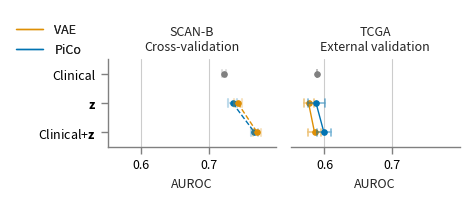

In [9]:
# COMBINED TRAIN AND EXT VAL PERFORMANCE -- DATASET FACET
# AUROC
from matplotlib.lines import Line2D

metric = "auroc"

metric_hopt = f"val_{metric}"
metric = f"test_{metric}"

target = "BCFi_5Y"

palette = sns.color_palette("colorblind")
# palette = {"PiCo_D": pal[1], "VAE": pal[0],}
pal_0_desat = sns.set_hls_values(palette[0], l=0.6, s=0.5)
pal_1_desat = sns.set_hls_values(palette[1], l=0.6, s=0.5)
pal_cv = {
    "VAE": palette[1],
    "PiCo": palette[0],
    "NA": "grey",
}
pal_ev = {
    "VAE": palette[1],
    "PiCo": palette[0],
    "NA": "grey",
}

plot_order = ["Clinical", "Rep", "Clinical+Rep"]

facet_order = ["SCAN-B\nCross-validation", "TCGA\nExternal validation"]

hopt_df_plot = hopt_df.copy()

hopt_df_plot["rep_type_hue"] = hopt_df_plot["rep_type"].copy()
hopt_df_plot.loc[
    hopt_df_plot["feat_sets"].isin(["Clinical"]),
    "rep_type_hue",
] = "NA"

fig, ax = plt.subplots(1, 2, figsize=(4.5, 2))

## PLOTS CV RESULTS
if target == "RCB.score":
    g1 = sns.pointplot(
        data=hopt_df_plot,
        y="feat_sets",
        x=metric_hopt,
        hue="rep_type_hue",
        order=plot_order,
        palette=pal_cv,
        linestyle="--",
        linewidth=1,
        markersize=4,
        errorbar=("sd", 1),
        capsize=0.25,
        marker="o",
        err_kws={"linewidth": 1.5, "alpha": 0.25},
        # legend=False,
        ax=ax[0],
    )
    # , errorbar=("ci", 95), capsize=0.1, err_kws={"linewidth": 1, "alpha": 0.5})
else:
    g1 = sns.pointplot(
        data=hopt_df_plot,
        y="feat_sets",
        x=metric_hopt,
        hue="rep_type_hue",
        order=plot_order,
        palette=pal_cv,
        linestyle="--",
        linewidth=1,
        markersize=4,
        errorbar=("sd", 1),
        capsize=0.25,
        marker="o",
        err_kws={"linewidth": 1.5, "alpha": 0.25},
        # legend=False,
        ax=ax[0],
    )  # , errorbar=("ci", 95), capsize=0.1, err_kws={"linewidth": 1, "alpha": 0.5})


## PLOTS EXT VAL RESULTS
metrics_df_plot = test_metrics_df.copy(deep=True)
metrics_df_plot["rep_type_hue"] = metrics_df_plot["rep_type"].copy()
metrics_df_plot.loc[metrics_df_plot["feat_sets"].isin(["Clinical"]), "rep_type_hue"] = (
    "NA"
)

if target == "RCB.score":
    sns.pointplot(
        data=metrics_df_plot,
        y="feat_sets",
        x=metric,
        hue="rep_type_hue",
        order=plot_order,
        palette=pal_ev,
        linestyle="-",
        linewidth=1,
        markersize=4,
        marker="o",
        errorbar=("sd", 1),
        capsize=0.25,
        err_kws={"linewidth": 1.2, "alpha": 0.5},
        ax=ax[1],
        legend=False,
    )
else:
    sns.pointplot(
        data=metrics_df_plot,
        y="feat_sets",
        x=metric,
        hue="rep_type_hue",
        palette=pal_ev,
        order=plot_order,
        linestyle="-",
        linewidth=1,
        markersize=4,
        marker="o",
        errorbar=("sd", 1),
        capsize=0.25,
        err_kws={"linewidth": 1.2, "alpha": 0.5},
        ax=ax[1],
        legend=False,
    )

handles, labels = plt.gca().get_legend_handles_labels()

line_train = Line2D([0], [0], label="VAE", color=palette[1], linestyle="-", linewidth=1)
line_val = Line2D([0], [0], label="PiCo", color=palette[0], linestyle="-", linewidth=1)

leg1 = ax[0].legend(
    handles=handles[3:],
    bbox_to_anchor=(1.0, 1.65),
    loc="upper center",
    frameon=False,
    ncol=3,
    fontsize=10,
)

leg2 = ax[0].legend(
    handles=[line_train, line_val],
    bbox_to_anchor=(-0.35, 1.55),
    loc="upper center",
    frameon=False,
    ncol=1,
    fontsize=10,
)

ax[0].add_artist(leg1)
ax[0].add_artist(leg2)

# Rename y ticks
names_dict = {
    "Clinical": "Clinical",
    "Rep": r"$\mathbf{z}$",
    "Clinical+Rep": r"Clinical+$\mathbf{z}$",
}
# ax.set_yticks(names_dict.keys())
ax[0].set_yticklabels(names_dict.values())

# sns.move_legend(ax, "upper center", bbox_to_anchor=(.5, -.2), ncol=1, title=None, frameon=False)
sns.despine()
for i, ax in enumerate(ax):
    ax.set_ylabel("")
    if metric == "test_auroc":
        ax.set_xlabel("AUROC", fontsize=10)
        ax.set_xlim(0.55, 0.8)
        ax.set_xticks([0.6, 0.7], [0.6, 0.7])
    elif metric == "test_aupr":
        ax.set_xlabel("AUPR", fontsize=10)
        # ax.set_xlim(0.35, 0.75)
        # ax.set_xticks([0.4, 0.5, 0.6, 0.7], [0.4, 0.5, 0.6, 0.7])
    elif metric == "test_f1":
        ax.set_xlabel("F1 score", fontsize=10)
        # ax.set_xlim(0.35, 0.75)
        # ax.set_xticks([0.4, 0.5, 0.6, 0.7], [0.4, 0.5, 0.6, 0.7])
    elif metric == "test_cross_entropy":
        ax.set_xlabel("Cross-entropy", fontsize=10)
        # ax.set_xlim(0.3, 0.6)
        # ax.set_xticks([0.3, 0.4, 0.5, 0.6], [0.3, 0.4, 0.5, 0.6])
    ax.set_title("")
    ax.text(
        s=facet_order[i],
        x=0.5,
        y=1.1,
        transform=ax.transAxes,
        fontweight="regular",
        horizontalalignment="center",
        fontsize=10,
    )
    ax.grid(visible=True, axis="x")
    ax.tick_params(labelsize=10)
    if i > 0:
        sns.despine(left=True, ax=ax)
        ax.tick_params(
            top=False,
            bottom=True,
            left=False,
            right=False,
            labelleft=False,
            labelbottom=True,
            labelsize=10,
        )

fig.tight_layout()

plt.savefig(
    f"./figures/scanb/perf_facet_{target}_{metric}.png",
    # bbox_extra_artists=(leg1, leg2),
    bbox_inches="tight",
    dpi=600,
)
plt.savefig(
    f"./figures/scanb/perf_facet_{target}_{metric}.svg",
    # bbox_extra_artists=(leg1, leg2),
    bbox_inches="tight",
)

In [7]:
# VALUES FOR PAPER REPORTING
test_metrics_df.groupby(["rep_type", "model_type", "feat_sets", "dataset"]).mean()

Unnamed: 0  \
rep_type model_type         feat_sets    dataset               
PiCo     LogisticRegression Clinical     test            0.0   
                            Clinical+Rep test            0.0   
                            Rep          test            0.0   
VAE      LogisticRegression Clinical     test            0.0   
                            Clinical+Rep test            0.0   
                            Rep          test            0.0   

                                                  test_cross_entropy  \
rep_type model_type         feat_sets    dataset                       
PiCo     LogisticRegression Clinical     test               0.793385   
                            Clinical+Rep test               0.990820   
                            Rep          test               0.942267   
VAE      LogisticRegression Clinical     test               0.793385   
                            Clinical+Rep test               1.008726   
                            Rep          test               0.966400   

                                                   test_f1  test_aupr  \
rep_type model_type         feat_sets    dataset                        
PiCo     LogisticRegression Clinical     test     0.408696   0.331975   
                            Clinical+Rep test     0.400442   0.332342   
                            Rep          test     0.403182   0.292533   
VAE      LogisticRegression Clinical     test     0.408696   0.331975   
                            Clinical+Rep test     0.397477   0.323443   
                            Rep          test     0.391596   0.289843   

                                                  test_auroc  seed  
rep_type model_type         feat_sets    dataset                    
PiCo     LogisticRegression Clinical     test       0.589182  55.0  
                            Clinical+Rep test       0.599150  55.0  
                            Rep          test       0.587534  55.0  
VAE      LogisticRegression Clinical     test       0.589182  55.0  
                            Clinical+Rep test       0.585246  55.0  
                            Rep          test       0.576436  55.0

In [11]:
hopt_df_plot.groupby(["rep_type", "model_type", "feat_sets", "dataset"]).mean()

seed  Unnamed: 0  fold  \
rep_type model_type         feat_sets    dataset                           
PiCo     LogisticRegression Clinical     cv       55.0         2.0   2.0   
                            Clinical+Rep cv       55.0         2.0   2.0   
                            Rep          cv       55.0         2.0   2.0   
VAE      LogisticRegression Clinical     cv       55.0         2.0   2.0   
                            Clinical+Rep cv       55.0         2.0   2.0   
                            Rep          cv       55.0         2.0   2.0   

                                                  val_cross_entropy    val_f1  \
rep_type model_type         feat_sets    dataset                                
PiCo     LogisticRegression Clinical     cv                0.609103  0.299902   
                            Clinical+Rep cv                0.555978  0.341698   
                            Rep          cv                0.586108  0.310497   
VAE      LogisticRegression Clinical     cv                0.609103  0.299902   
                            Clinical+Rep cv                0.549280  0.341855   
                            Rep          cv                0.579333  0.313248   

                                                  val_aupr  val_auroc  
rep_type model_type         feat_sets    dataset                       
PiCo     LogisticRegression Clinical     cv       0.251798   0.722592  
                            Clinical+Rep cv       0.326942   0.767649  
                            Rep          cv       0.275129   0.735312  
VAE      LogisticRegression Clinical     cv       0.251798   0.722592  
                            Clinical+Rep cv       0.333188   0.771548  
                            Rep          cv       0.287110   0.742816

In [25]:
# TEST SET RESULTS BY SUBTYPE
import json
from utils.comp_utils import calculate_feat_imps, plot_feat_imps_v2
from lifelines.utils import concordance_index
from sklearn.metrics import log_loss, roc_curve, precision_recall_curve, auc, f1_score

res_root = f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/{target}/{experiment}/pico"
seeds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

feat_sets_subtype = {"Clinical+Rep": "_AGE_5", "Clinical": "_AGE_5_norep"}

test_metrics_list = []

for feat_set, ext in feat_sets_subtype.items():
    for rep_type, rep_type_label in rep_types.items():
        for model_type in model_types:
            # if rep_type_label == "PiCo":
            # try:
            #     pred_dict_list, constraints, confounders, feat_imps_df = calculate_feat_imps(enc=rep_type, reg=model_type, model_path=f"{res_root}/{model_type}_{rep_type + ext}", target=target, seeds=seeds)
            #     if feat_set in ["Clinical"]:
            #         zdim = 0
            #         norep = True
            #     else:
            #         zdim = 64
            #         norep = False

            #     plot_feat_imps_v2(feat_imps_df, target=target, constraints=constraints, confounders=feat_sets_conf[feat_set], zdim=zdim, enc=rep_type, reg=model_type, experiment=experiment, names_map=names_map, metric="auroc", norep=norep, sort_feats=True, top_k=16)
            # except:
            #     print(f"Cannot produce feat imp plot for {model_type}, {rep_type}, {ext}...")
            for seed in seeds:
                try:
                    # best_trial = pd.read_csv(f"{res_root}/{model_type}_{rep_type + ext}/opt_study_results_s{seed}.csv").sort_values("value", ascending=False)["number"][0]
                    # curr_hopt_df = pd.read_csv(f"{res_root}/{model_type}_{rep_type + ext}/cv_results_{best_trial}_s{seed}.csv")

                    curr_preds = pd.read_csv(
                        f"{res_root}/{model_type}_{rep_type + ext}/z_pred_test_s{seed}.csv"
                    )

                    curr_preds_00 = curr_preds[
                        (curr_preds["c_1"] < 0) & (curr_preds["c_2"] < 0)
                    ]
                    curr_preds_10 = curr_preds[
                        (curr_preds["c_1"] > 0) & (curr_preds["c_2"] < 0)
                    ]
                    curr_preds_01 = curr_preds[
                        (curr_preds["c_1"] < 0) & (curr_preds["c_2"] > 0)
                    ]
                    curr_preds_11 = curr_preds[
                        (curr_preds["c_1"] > 0) & (curr_preds["c_2"] > 0)
                    ]

                    subtype_preds = {
                        "ER-/HER2-": curr_preds_00,
                        "ER+/HER2-": curr_preds_10,
                        "ER-/HER2+": curr_preds_01,
                        "ER+/HER2+": curr_preds_11,
                    }

                    for subtype, preds in subtype_preds.items():
                        # Calculate AUROC for each subtype
                        curr_pred = preds[["pred_0", "y"]].dropna()

                        bce = log_loss(
                            curr_pred["y"].to_numpy(),
                            curr_pred["pred_0"].to_numpy(),
                            eps=1e-8,
                        )

                        fpr, tpr, threshold = roc_curve(
                            curr_pred["y"].to_numpy(),
                            curr_pred["pred_0"].to_numpy(),
                            pos_label=1,
                        )

                        auroc = auc(fpr, tpr)
                        precision, recall, thresholds = precision_recall_curve(
                            curr_pred["y"].to_numpy(),
                            curr_pred["pred_0"].to_numpy(),
                            pos_label=1,
                        )
                        aupr = auc(recall, precision)
                        f1 = f1_score(
                            curr_pred["y"].to_numpy(),
                            (curr_pred["pred_0"].to_numpy() > 0.5),
                        )

                        test_metrics_list.append(
                            {
                                "subtype": subtype,
                                "n": len(preds),
                                "rep_type": rep_type,
                                "model_type": model_type,
                                "feat_sets": feat_set,
                                "seed": seed,
                                "auroc": auroc,
                                "aupr": aupr,
                                "f1": f1,
                                "bce": bce,
                            }
                        )

                except:
                    print(f"{model_type}, {rep_type}, {ext}, {seed} not found")
                    continue


test_metrics_df = pd.DataFrame.from_dict(test_metrics_list)
test_metrics_df["dataset"] = "TCGA"

# Print results on external validation for reporting
test_metrics_df.groupby(
    ["rep_type", "model_type", "feat_sets", "dataset", "subtype"]
).mean().reset_index()

,rep_type,model_type,feat_sets,dataset,subtype,n,seed,auroc,aupr,f1,bce
0,icovae_MCL1_16,LogisticRegression,Clinical,TCGA,ER+/HER2+,127.0,55.0,0.223214,0.082543,0.068966,0.902191
1,icovae_MCL1_16,LogisticRegression,Clinical,TCGA,ER+/HER2-,527.0,55.0,0.657738,0.342017,0.461538,0.660815
2,icovae_MCL1_16,LogisticRegression,Clinical,TCGA,ER-/HER2+,40.0,55.0,0.555556,0.577778,0.307692,1.369371
3,icovae_MCL1_16,LogisticRegression,Clinical,TCGA,ER-/HER2-,155.0,55.0,0.630886,0.454297,0.478873,0.965362
4,icovae_MCL1_16,LogisticRegression,Clinical+Rep,TCGA,ER+/HER2+,127.0,55.0,0.286607,0.088937,0.131748,1.272502
5,icovae_MCL1_16,LogisticRegression,Clinical+Rep,TCGA,ER+/HER2-,527.0,55.0,0.674454,0.436087,0.417446,0.779782
6,icovae_MCL1_16,LogisticRegression,Clinical+Rep,TCGA,ER-/HER2+,40.0,55.0,0.472222,0.171641,0.301709,1.509175
7,icovae_MCL1_16,LogisticRegression,Clinical+Rep,TCGA,ER-/HER2-,155.0,55.0,0.501524,0.357474,0.501796,1.280608
8,vae,LogisticRegression,Clinical,TCGA,ER+/HER2+,127.0,55.0,0.223214,0.082543,0.068966,0.902191
9,vae,LogisticRegression,Clinical,TCGA,ER+/HER2-,527.0,55.0,0.657738,0.342017,0.461538,0.660815


/tmp/ipykernel_3852724/1065528671.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names_dict.values())
/tmp/ipykernel_3852724/1065528671.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names_dict.values())
/tmp/ipykernel_3852724/1065528671.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names_dict.values())
/tmp/ipykernel_3852724/1065528671.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names_dict.values())


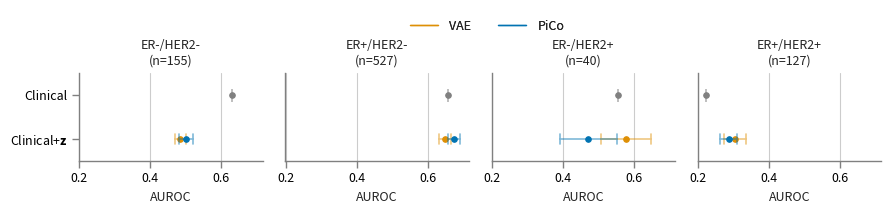

In [26]:
# COMBINED TRAIN AND EXT VAL PERFORMANCE -- DATASET FACET -- SPLIT BY SUBTYPE
# AUROC
from matplotlib.lines import Line2D

from matplotlib.lines import Line2D

metric = "auroc"

target = "BCFS_5Y"

palette = sns.color_palette("colorblind")
# palette = {"PiCo_D": pal[1], "VAE": pal[0],}
pal_0_desat = sns.set_hls_values(palette[0], l=0.6, s=0.5)
pal_1_desat = sns.set_hls_values(palette[1], l=0.6, s=0.5)
pal_ev = {
    "vae": palette[1],
    "icovae_MCL1_16": palette[0],
    "NA": "grey",
}

plot_order = ["Clinical", "Clinical+Rep"]

facet_order = ["TransNEO\nCross-validation", "ARTemis+PBCP\nExternal validation"]

fig, axes = plt.subplots(1, 4, figsize=(9, 2), sharex=True)

## PLOTS EXT VAL RESULTS
metrics_df_plot = test_metrics_df.copy(deep=True)
metrics_df_plot["rep_type_hue"] = metrics_df_plot["rep_type"].copy()
metrics_df_plot.loc[
    metrics_df_plot["feat_sets"].isin(["Clinical+RNA", "Clinical", "RNA"]),
    "rep_type_hue",
] = "NA"

subtypes = metrics_df_plot["subtype"].unique()


for i, ax in enumerate(axes):
    curr_metrics_plot = metrics_df_plot[metrics_df_plot["subtype"] == subtypes[i]]
    if target == "RCB.score":
        sns.pointplot(
            data=curr_metrics_plot,
            y="feat_sets",
            x=metric,
            hue="rep_type_hue",
            order=plot_order,
            palette=pal_ev,
            linestyle="-",
            linewidth=1,
            markersize=4,
            marker="o",
            errorbar=("sd", 1),
            capsize=0.25,
            err_kws={"linewidth": 1.2, "alpha": 0.5},
            ax=ax,
            legend=False,
        )
    else:
        sns.pointplot(
            data=curr_metrics_plot,
            y="feat_sets",
            x=metric,
            hue="rep_type_hue",
            palette=pal_ev,
            order=plot_order,
            linestyle="-",
            linewidth=1,
            markersize=4,
            marker="o",
            errorbar=("sd", 1),
            capsize=0.25,
            err_kws={"linewidth": 1.2, "alpha": 0.5},
            ax=ax,
            legend=False,
        )

    handles, labels = plt.gca().get_legend_handles_labels()

    line_train = Line2D(
        [0], [0], label="VAE", color=palette[1], linestyle="-", linewidth=1
    )
    line_val = Line2D(
        [0], [0], label="PiCo", color=palette[0], linestyle="-", linewidth=1
    )

    if i == len(subtypes) - 1:
        leg1 = ax.legend(
            handles=handles[3:],
            bbox_to_anchor=(1.0, 1.8),
            loc="upper center",
            frameon=False,
            ncol=2,
            fontsize=10,
        )

        leg2 = ax.legend(
            handles=[line_train, line_val],
            bbox_to_anchor=(-1.15, 1.75),
            loc="upper center",
            frameon=False,
            ncol=2,
            fontsize=10,
        )

        ax.add_artist(leg1)
        ax.add_artist(leg2)

    # Rename y ticks
    names_dict = {"Clinical": "Clinical", "Clinical+Rep": r"Clinical+$\mathbf{z}$"}
    # ax.set_yticks(names_dict.keys())
    ax.set_yticklabels(names_dict.values())

    # sns.move_legend(ax, "upper center", bbox_to_anchor=(.5, -.2), ncol=1, title=None, frameon=False)
    sns.despine()
    ax.set_ylabel("")
    if metric == "auroc":
        ax.set_xlabel("AUROC", fontsize=10)
        # ax.set_xlim(0.62, 0.92)
        # ax.set_xticks([0.7, 0.8, 0.9], [0.7, 0.8, 0.9])
        # ax.set_xlabel("AUROC")
    elif metric == "log_likelihood":
        ax.set_xlabel("AUPR", fontsize=10)
        ax.set_xlim(0.35, 0.75)
        ax.set_xticks([0.4, 0.5, 0.6, 0.7], [0.4, 0.5, 0.6, 0.7])
    elif metric == "test_f1":
        ax.set_xlabel("F1 score", fontsize=10)
        ax.set_xlim(0.35, 0.75)
        ax.set_xticks([0.4, 0.5, 0.6, 0.7], [0.4, 0.5, 0.6, 0.7])
    elif metric == "test_cross_entropy":
        ax.set_xlabel("Cross-entropy", fontsize=10)
        ax.set_xlim(0.3, 0.6)
        ax.set_xticks([0.3, 0.4, 0.5, 0.6], [0.3, 0.4, 0.5, 0.6])
    ax.set_title("")
    ax.text(
        s=f"{subtypes[i]}\n(n={curr_metrics_plot['n'].iloc[0]})",
        x=0.5,
        y=1.1,
        transform=ax.transAxes,
        fontweight="regular",
        horizontalalignment="center",
        fontsize=10,
    )
    ax.grid(visible=True, axis="x")
    ax.tick_params(labelsize=10)
    if i > 0:
        sns.despine(left=False, ax=ax)
        ax.tick_params(
            top=False,
            bottom=True,
            left=False,
            right=False,
            labelleft=False,
            labelbottom=True,
            labelsize=10,
        )

fig.tight_layout()

plt.savefig(
    f"./figures/scanb/perf_facet_{target}_{metric}_subtype.png",
    # bbox_extra_artists=(leg1, leg2),
    bbox_inches="tight",
    dpi=600,
)
plt.savefig(
    f"./figures/scanb/perf_facet_{target}_{metric}_subtype.svg",
    # bbox_extra_artists=(leg1, leg2),
    bbox_inches="tight",
)

## 5.2 Survival prediction (CoxPH)

In [3]:
target = "BCFi"
experiment = "tcga"
rep_types = {"vae": "VAE", "icovae_MCL1_16": "PiCo"}
model_types = ["CoxPH"]
feat_sets = {"Rep": "", "Clinical+Rep": "_AGE_5", "Clinical": "_AGE_5_norep"}
feat_sets_conf = {
    "Rep": [],
    "Clinical+Rep": ["AGE", "ER", "HER2", "LN", "SIZE"],
    "Clinical": ["AGE", "ER", "HER2", "LN", "SIZE"],
}
# Mapping for feature names in plots
names_map = {
    "AGE": "Age at diagnosis",
    "ER": "ER status",
    "HER2": "HER2 status",
    "LN": "Lymph node status",
    "Size": "Size >20mm",
}

In [4]:
# LOAD TEST SET RESULTS
from utils.comp_utils import calculate_feat_imps, plot_feat_imps_v2

res_root = f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/{target}/{experiment}/pico"
seeds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

test_metrics_df = None
hopt_df = None

for feat_set, ext in feat_sets.items():
    for rep_type, rep_type_label in rep_types.items():
        for model_type in model_types:
            # if rep_type_label == "PiCo":
            # try:
            #     pred_dict_list, constraints, confounders, feat_imps_df = calculate_feat_imps(enc=rep_type, reg=model_type, model_path=f"{res_root}/{model_type}_{rep_type + ext}", target=target, seeds=seeds)
            #     if feat_set in ["Clinical"]:
            #         zdim = 0
            #         norep = True
            #     else:
            #         zdim = 64
            #         norep = False

            #     plot_feat_imps_v2(feat_imps_df, target=target, constraints=constraints, confounders=feat_sets_conf[feat_set], zdim=zdim, enc=rep_type, reg=model_type, experiment=experiment, names_map=names_map, metric="auroc", norep=norep, sort_feats=True, top_k=16)
            # except:
            #     print(f"Cannot produce feat imp plot for {model_type}, {rep_type}, {ext}...")
            for seed in seeds:
                try:
                    best_trial = pd.read_csv(
                        f"{res_root}/{model_type}_{rep_type + ext}/opt_study_results_s{seed}.csv"
                    ).sort_values("value", ascending=False)["number"][0]
                    curr_hopt_df = pd.read_csv(
                        f"{res_root}/{model_type}_{rep_type + ext}/cv_results_{best_trial}_s{seed}.csv"
                    )

                    curr_test_metrics_df = pd.read_csv(
                        f"{res_root}/{model_type}_{rep_type + ext}/test_metrics_s{seed}.csv"
                    )
                    curr_test_metrics_df["rep_type"] = rep_type_label
                    curr_test_metrics_df["model_type"] = model_type
                    curr_hopt_df["rep_type"] = rep_type_label
                    curr_hopt_df["model_type"] = model_type
                    # Placeholder until we add clinical features etc
                    curr_test_metrics_df["feat_sets"] = feat_set
                    curr_hopt_df["feat_sets"] = feat_set
                    curr_hopt_df["seed"] = seed
                    curr_test_metrics_df["seed"] = seed
                    if test_metrics_df is None:
                        test_metrics_df = curr_test_metrics_df
                    else:
                        test_metrics_df = pd.concat(
                            [test_metrics_df, curr_test_metrics_df], axis=0
                        )
                    if hopt_df is None:
                        hopt_df = curr_hopt_df
                    else:
                        hopt_df = pd.concat([hopt_df, curr_hopt_df], axis=0)
                except:
                    print(f"{model_type}, {rep_type}, {ext}, {seed} not found")
                    continue


test_metrics_df["dataset"] = "test"
hopt_df["dataset"] = "cv"

# Mean over folds for hopt
hopt_df = (
    hopt_df.groupby(["rep_type", "model_type", "feat_sets", "dataset", "seed"])
    .mean()
    .reset_index()
)

# Print results on external validation for reporting
test_metrics_df.groupby(
    ["rep_type", "model_type", "feat_sets", "dataset"]
).mean().reset_index()

,rep_type,model_type,feat_sets,dataset,Unnamed: 0,test_neg_log_likelihood,test_concordance_index,seed
0,PiCo,CoxPH,Clinical,test,0.0,0.424240,0.595243,55.0
1,PiCo,CoxPH,Clinical+Rep,test,0.0,0.431196,0.642706,55.0
2,PiCo,CoxPH,Rep,test,0.0,0.492771,0.617061,55.0
3,VAE,CoxPH,Clinical,test,0.0,0.424240,0.595243,55.0
4,VAE,CoxPH,Clinical+Rep,test,0.0,0.430933,0.645447,55.0
5,VAE,CoxPH,Rep,test,0.0,0.490466,0.615656,55.0


In [5]:
hopt_df.groupby(["rep_type", "model_type", "feat_sets", "dataset"]).mean().reset_index()

,rep_type,model_type,feat_sets,dataset,seed,Unnamed: 0,fold,val_neg_log_likelihood,val_concordance_index
0,PiCo,CoxPH,Clinical,cv,55.0,2.0,2.0,0.280164,0.677298
1,PiCo,CoxPH,Clinical+Rep,cv,55.0,2.0,2.0,0.273764,0.755735
2,PiCo,CoxPH,Rep,cv,55.0,2.0,2.0,0.311801,0.723864
3,VAE,CoxPH,Clinical,cv,55.0,2.0,2.0,0.280164,0.677298
4,VAE,CoxPH,Clinical+Rep,cv,55.0,2.0,2.0,0.273245,0.757273
5,VAE,CoxPH,Rep,cv,55.0,2.0,2.0,0.311300,0.726360


/tmp/ipykernel_3462019/44793930.py:158: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(names_dict.values())
/tmp/ipykernel_3462019/44793930.py:197: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(
/tmp/ipykernel_3462019/44793930.py:197: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(
/tmp/ipykernel_3462019/44793930.py:197: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(


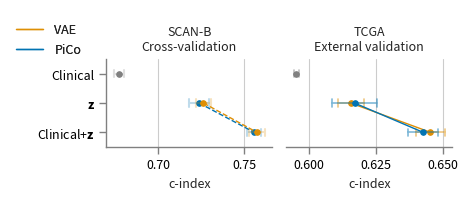

In [25]:
# COMBINED TRAIN AND EXT VAL PERFORMANCE -- DATASET FACET
# AUROC
from matplotlib.lines import Line2D

metric = "concordance_index"

metric_hopt = f"val_{metric}"
metric = f"test_{metric}"

target = "BCFi"

palette = sns.color_palette("colorblind")
# palette = {"PiCo_D": pal[1], "VAE": pal[0],}
pal_0_desat = sns.set_hls_values(palette[0], l=0.6, s=0.5)
pal_1_desat = sns.set_hls_values(palette[1], l=0.6, s=0.5)
pal_cv = {
    "VAE": palette[1],
    "PiCo": palette[0],
    "NA": "grey",
}
pal_ev = {
    "VAE": palette[1],
    "PiCo": palette[0],
    "NA": "grey",
}

plot_order = ["Clinical", "Rep", "Clinical+Rep"]

facet_order = ["SCAN-B\nCross-validation", "TCGA\nExternal validation"]

hopt_df_plot = hopt_df.copy()

hopt_df_plot["rep_type_hue"] = hopt_df_plot["rep_type"].copy()
hopt_df_plot.loc[
    hopt_df_plot["feat_sets"].isin(["Clinical"]),
    "rep_type_hue",
] = "NA"

fig, ax = plt.subplots(1, 2, figsize=(4.5, 2))

## PLOTS CV RESULTS
if target == "RCB.score":
    g1 = sns.pointplot(
        data=hopt_df_plot,
        y="feat_sets",
        x=metric_hopt,
        hue="rep_type_hue",
        order=plot_order,
        palette=pal_cv,
        linestyle="--",
        linewidth=1,
        markersize=4,
        errorbar=("sd", 1),
        capsize=0.25,
        marker="o",
        err_kws={"linewidth": 1.5, "alpha": 0.25},
        # legend=False,
        ax=ax[0],
    )
    # , errorbar=("ci", 95), capsize=0.1, err_kws={"linewidth": 1, "alpha": 0.5})
else:
    g1 = sns.pointplot(
        data=hopt_df_plot,
        y="feat_sets",
        x=metric_hopt,
        hue="rep_type_hue",
        order=plot_order,
        palette=pal_cv,
        linestyle="--",
        linewidth=1,
        markersize=4,
        errorbar=("sd", 1),
        capsize=0.25,
        marker="o",
        err_kws={"linewidth": 1.5, "alpha": 0.25},
        # legend=False,
        ax=ax[0],
    )  # , errorbar=("ci", 95), capsize=0.1, err_kws={"linewidth": 1, "alpha": 0.5})


## PLOTS EXT VAL RESULTS
metrics_df_plot = test_metrics_df.copy(deep=True)
metrics_df_plot["rep_type_hue"] = metrics_df_plot["rep_type"].copy()
metrics_df_plot.loc[metrics_df_plot["feat_sets"].isin(["Clinical"]), "rep_type_hue"] = (
    "NA"
)

if target == "RCB.score":
    sns.pointplot(
        data=metrics_df_plot,
        y="feat_sets",
        x=metric,
        hue="rep_type_hue",
        order=plot_order,
        palette=pal_ev,
        linestyle="-",
        linewidth=1,
        markersize=4,
        marker="o",
        errorbar=("sd", 1),
        capsize=0.25,
        err_kws={"linewidth": 1.2, "alpha": 0.5},
        ax=ax[1],
        legend=False,
    )
else:
    sns.pointplot(
        data=metrics_df_plot,
        y="feat_sets",
        x=metric,
        hue="rep_type_hue",
        palette=pal_ev,
        order=plot_order,
        linestyle="-",
        linewidth=1,
        markersize=4,
        marker="o",
        errorbar=("sd", 1),
        capsize=0.25,
        err_kws={"linewidth": 1.2, "alpha": 0.5},
        ax=ax[1],
        legend=False,
    )

handles, labels = plt.gca().get_legend_handles_labels()

line_train = Line2D([0], [0], label="VAE", color=palette[1], linestyle="-", linewidth=1)
line_val = Line2D([0], [0], label="PiCo", color=palette[0], linestyle="-", linewidth=1)

leg1 = ax[0].legend(
    handles=handles[3:],
    bbox_to_anchor=(1.0, 1.65),
    loc="upper center",
    frameon=False,
    ncol=3,
    fontsize=10,
)

leg2 = ax[0].legend(
    handles=[line_train, line_val],
    bbox_to_anchor=(-0.35, 1.55),
    loc="upper center",
    frameon=False,
    ncol=1,
    fontsize=10,
)

ax[0].add_artist(leg1)
ax[0].add_artist(leg2)

# Rename y ticks
names_dict = {
    "Clinical": "Clinical",
    "Rep": r"$\mathbf{z}$",
    "Clinical+Rep": r"Clinical+$\mathbf{z}$",
}
# ax.set_yticks(names_dict.keys())
ax[0].set_yticklabels(names_dict.values())

# sns.move_legend(ax, "upper center", bbox_to_anchor=(.5, -.2), ncol=1, title=None, frameon=False)
sns.despine()
for i, ax in enumerate(ax):
    ax.set_ylabel("")
    if metric == "test_concordance_index":
        ax.set_xlabel("c-index", fontsize=10)
        # ax.set_xlim(0.55, 0.8)
        # ax.set_xticks([0.6, 0.7], [0.6, 0.7])
    elif metric == "test_neg_log_likelihood":
        ax.set_xlabel("log likelihood", fontsize=10)
        # ax.set_xlim(0.35, 0.75)
    ax.set_title("")
    ax.text(
        s=facet_order[i],
        x=0.5,
        y=1.1,
        transform=ax.transAxes,
        fontweight="regular",
        horizontalalignment="center",
        fontsize=10,
    )
    ax.grid(visible=True, axis="x")
    ax.tick_params(labelsize=10)
    if i > 0:
        sns.despine(left=True, ax=ax)
        ax.tick_params(
            top=False,
            bottom=True,
            left=False,
            right=False,
            labelleft=False,
            labelbottom=True,
            labelsize=10,
        )

fig.tight_layout()

plt.savefig(
    f"./figures/scanb/perf_facet_{target}_{metric}.png",
    # bbox_extra_artists=(leg1, leg2),
    bbox_inches="tight",
    dpi=600,
)
plt.savefig(
    f"./figures/scanb/perf_facet_{target}_{metric}.svg",
    # bbox_extra_artists=(leg1, leg2),
    bbox_inches="tight",
)

In [28]:
# TEST SET RESULTS BY SUBTYPE
from utils.comp_utils import calculate_feat_imps, plot_feat_imps_v2

res_root = f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/{target}/{experiment}/pico"
seeds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

feat_sets_subtype = {"Clinical+Rep": "_AGE_5", "Clinical": "_AGE_5_norep"}

test_metrics_list = []

for feat_set, ext in feat_sets_subtype.items():
    for rep_type, rep_type_label in rep_types.items():
        for model_type in model_types:
            # if rep_type_label == "PiCo":
            # try:
            #     pred_dict_list, constraints, confounders, feat_imps_df = calculate_feat_imps(enc=rep_type, reg=model_type, model_path=f"{res_root}/{model_type}_{rep_type + ext}", target=target, seeds=seeds)
            #     if feat_set in ["Clinical"]:
            #         zdim = 0
            #         norep = True
            #     else:
            #         zdim = 64
            #         norep = False

            #     plot_feat_imps_v2(feat_imps_df, target=target, constraints=constraints, confounders=feat_sets_conf[feat_set], zdim=zdim, enc=rep_type, reg=model_type, experiment=experiment, names_map=names_map, metric="auroc", norep=norep, sort_feats=True, top_k=16)
            # except:
            #     print(f"Cannot produce feat imp plot for {model_type}, {rep_type}, {ext}...")
            for seed in seeds:
                # try:
                # best_trial = pd.read_csv(f"{res_root}/{model_type}_{rep_type + ext}/opt_study_results_s{seed}.csv").sort_values("value", ascending=False)["number"][0]
                # curr_hopt_df = pd.read_csv(f"{res_root}/{model_type}_{rep_type + ext}/cv_results_{best_trial}_s{seed}.csv")

                curr_preds = pd.read_csv(
                    f"{res_root}/{model_type}_{rep_type + ext}/z_pred_test_s{seed}.csv"
                )
                with open(
                    f"{res_root}/{model_type}_{rep_type + ext}/regressor_s{seed}.txt"
                ) as reg_model:
                    data = json.load(reg_model)
                    reg_weights = np.array(data["coeffs"])

                test_z_rep_z = curr_preds.iloc[
                    :,
                    curr_preds.columns.str.startswith("z")
                    | curr_preds.columns.str.startswith("c"),
                ]
                # Need to drop ER status since this is used as a strata
                test_z_rep_z_pred = test_z_rep_z.drop("c_1", axis=1)
                # Calculate -BtX -- this can be used in c-index
                test_z_pred = -(test_z_rep_z_pred * reg_weights).sum(axis=1)
                curr_preds["log_hazard"] = test_z_pred

                curr_preds_00 = curr_preds[
                    (curr_preds["c_1"] < 0) & (curr_preds["c_2"] < 0)
                ]
                curr_preds_10 = curr_preds[
                    (curr_preds["c_1"] > 0) & (curr_preds["c_2"] < 0)
                ]
                curr_preds_01 = curr_preds[
                    (curr_preds["c_1"] < 0) & (curr_preds["c_2"] > 0)
                ]
                curr_preds_11 = curr_preds[
                    (curr_preds["c_1"] > 0) & (curr_preds["c_2"] > 0)
                ]

                subtype_preds = {
                    "ER-/HER2-": curr_preds_00,
                    "ER+/HER2-": curr_preds_10,
                    "ER-/HER2+": curr_preds_01,
                    "ER+/HER2+": curr_preds_11,
                }

                for subtype, preds in subtype_preds.items():
                    pred_metrics = preds.dropna()
                    c_index = concordance_index(
                        event_times=pred_metrics["MONTHS"],
                        predicted_scores=pred_metrics["log_hazard"],
                        event_observed=pred_metrics["STATUS"],
                    )

                    test_metrics_list.append(
                        {
                            "subtype": subtype,
                            "n": len(pred_metrics),
                            "rep_type": rep_type,
                            "model_type": model_type,
                            "feat_sets": feat_set,
                            "seed": seed,
                            "c_index": c_index,
                        }
                    )

                # except:
                #     print(f"{model_type}, {rep_type}, {ext}, {seed} not found")
                #     continue


test_metrics_df = pd.DataFrame.from_dict(test_metrics_list)
test_metrics_df["dataset"] = "TCGA"

# Print results on external validation for reporting
test_metrics_df.groupby(
    ["rep_type", "model_type", "feat_sets", "dataset", "subtype"]
).mean().reset_index()

,rep_type,model_type,feat_sets,dataset,subtype,n,seed,c_index
0,icovae_MCL1_16,CoxPH,Clinical,TCGA,ER+/HER2+,118.0,55.0,0.310788
1,icovae_MCL1_16,CoxPH,Clinical,TCGA,ER+/HER2-,504.0,55.0,0.635293
2,icovae_MCL1_16,CoxPH,Clinical,TCGA,ER-/HER2+,37.0,55.0,0.438596
3,icovae_MCL1_16,CoxPH,Clinical,TCGA,ER-/HER2-,146.0,55.0,0.642896
4,icovae_MCL1_16,CoxPH,Clinical+Rep,TCGA,ER+/HER2+,118.0,55.0,0.428216
5,icovae_MCL1_16,CoxPH,Clinical+Rep,TCGA,ER+/HER2-,504.0,55.0,0.685631
6,icovae_MCL1_16,CoxPH,Clinical+Rep,TCGA,ER-/HER2+,37.0,55.0,0.412281
7,icovae_MCL1_16,CoxPH,Clinical+Rep,TCGA,ER-/HER2-,146.0,55.0,0.523404
8,vae,CoxPH,Clinical,TCGA,ER+/HER2+,118.0,55.0,0.310788
9,vae,CoxPH,Clinical,TCGA,ER+/HER2-,504.0,55.0,0.635293


In [29]:
test_metrics_df

,subtype,n,rep_type,model_type,feat_sets,seed,c_index,dataset
0,ER-/HER2-,146,vae,CoxPH,Clinical+Rep,10,0.522992,TCGA
1,ER+/HER2-,504,vae,CoxPH,Clinical+Rep,10,0.678718,TCGA
2,ER-/HER2+,37,vae,CoxPH,Clinical+Rep,10,0.438596,TCGA
3,ER+/HER2+,118,vae,CoxPH,Clinical+Rep,10,0.439834,TCGA
4,ER-/HER2-,146,vae,CoxPH,Clinical+Rep,20,0.494852,TCGA
...,...,...,...,...,...,...,...,...
155,ER+/HER2+,118,icovae_MCL1_16,CoxPH,Clinical,90,0.309129,TCGA
156,ER-/HER2-,146,icovae_MCL1_16,CoxPH,Clinical,100,0.647220,TCGA
157,ER+/HER2-,504,icovae_MCL1_16,CoxPH,Clinical,100,0.635242,TCGA
158,ER-/HER2+,37,icovae_MCL1_16,CoxPH,Clinical,100,0.438596,TCGA


/tmp/ipykernel_3852724/2222040962.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names_dict.values())
/tmp/ipykernel_3852724/2222040962.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names_dict.values())
/tmp/ipykernel_3852724/2222040962.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names_dict.values())
/tmp/ipykernel_3852724/2222040962.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names_dict.values())


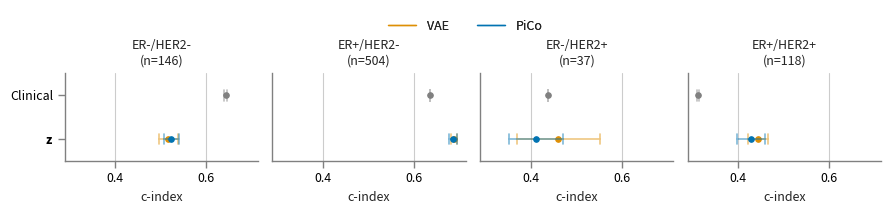

In [30]:
# COMBINED TRAIN AND EXT VAL PERFORMANCE -- DATASET FACET -- SPLIT BY SUBTYPE
# AUROC
from matplotlib.lines import Line2D

from matplotlib.lines import Line2D

metric = "c_index"

target = "BCFS"

palette = sns.color_palette("colorblind")
# palette = {"PiCo_D": pal[1], "VAE": pal[0],}
pal_0_desat = sns.set_hls_values(palette[0], l=0.6, s=0.5)
pal_1_desat = sns.set_hls_values(palette[1], l=0.6, s=0.5)
pal_ev = {
    "vae": palette[1],
    "icovae_MCL1_16": palette[0],
    "NA": "grey",
}

plot_order = ["Clinical", "Clinical+Rep"]

facet_order = ["TransNEO\nCross-validation", "ARTemis+PBCP\nExternal validation"]

fig, axes = plt.subplots(1, 4, figsize=(9, 2), sharex=True)

## PLOTS EXT VAL RESULTS
metrics_df_plot = test_metrics_df.copy(deep=True)
metrics_df_plot["rep_type_hue"] = metrics_df_plot["rep_type"].copy()
metrics_df_plot.loc[
    metrics_df_plot["feat_sets"].isin(["Clinical+RNA", "Clinical", "RNA"]),
    "rep_type_hue",
] = "NA"

subtypes = metrics_df_plot["subtype"].unique()


for i, ax in enumerate(axes):
    curr_metrics_plot = metrics_df_plot[metrics_df_plot["subtype"] == subtypes[i]]
    if target == "RCB.score":
        sns.pointplot(
            data=curr_metrics_plot,
            y="feat_sets",
            x=metric,
            hue="rep_type_hue",
            order=plot_order,
            palette=pal_ev,
            linestyle="-",
            linewidth=1,
            markersize=4,
            marker="o",
            errorbar=("sd", 1),
            capsize=0.25,
            err_kws={"linewidth": 1.2, "alpha": 0.5},
            ax=ax,
            legend=False,
        )
    else:
        sns.pointplot(
            data=curr_metrics_plot,
            y="feat_sets",
            x=metric,
            hue="rep_type_hue",
            palette=pal_ev,
            order=plot_order,
            linestyle="-",
            linewidth=1,
            markersize=4,
            marker="o",
            errorbar=("sd", 1),
            capsize=0.25,
            err_kws={"linewidth": 1.2, "alpha": 0.5},
            ax=ax,
            legend=False,
        )

    handles, labels = plt.gca().get_legend_handles_labels()

    line_train = Line2D(
        [0], [0], label="VAE", color=palette[1], linestyle="-", linewidth=1
    )
    line_val = Line2D(
        [0], [0], label="PiCo", color=palette[0], linestyle="-", linewidth=1
    )

    if i == len(subtypes) - 1:
        leg1 = ax.legend(
            handles=handles[3:],
            bbox_to_anchor=(1.0, 1.8),
            loc="upper center",
            frameon=False,
            ncol=2,
            fontsize=10,
        )

        leg2 = ax.legend(
            handles=[line_train, line_val],
            bbox_to_anchor=(-1.15, 1.75),
            loc="upper center",
            frameon=False,
            ncol=2,
            fontsize=10,
        )

        ax.add_artist(leg1)
        ax.add_artist(leg2)

    # Rename y ticks
    names_dict = {
        "Clinical": "Clinical",
        "Rep": r"$\mathbf{z}$",
        "Clinical+Rep": r"Clinical+$\mathbf{z}$",
    }
    # ax.set_yticks(names_dict.keys())
    ax.set_yticklabels(names_dict.values())

    # sns.move_legend(ax, "upper center", bbox_to_anchor=(.5, -.2), ncol=1, title=None, frameon=False)
    sns.despine()
    ax.set_ylabel("")
    if metric == "c_index":
        ax.set_xlabel("c-index", fontsize=10)
        # ax.set_xlim(0.62, 0.92)
        # ax.set_xticks([0.7, 0.8, 0.9], [0.7, 0.8, 0.9])
    elif metric == "log_likelihood":
        ax.set_xlabel("AUPR", fontsize=10)
        ax.set_xlim(0.35, 0.75)
        ax.set_xticks([0.4, 0.5, 0.6, 0.7], [0.4, 0.5, 0.6, 0.7])
    elif metric == "test_f1":
        ax.set_xlabel("F1 score", fontsize=10)
        ax.set_xlim(0.35, 0.75)
        ax.set_xticks([0.4, 0.5, 0.6, 0.7], [0.4, 0.5, 0.6, 0.7])
    elif metric == "test_cross_entropy":
        ax.set_xlabel("Cross-entropy", fontsize=10)
        ax.set_xlim(0.3, 0.6)
        ax.set_xticks([0.3, 0.4, 0.5, 0.6], [0.3, 0.4, 0.5, 0.6])
    ax.set_title("")
    ax.text(
        s=f"{subtypes[i]}\n(n={curr_metrics_plot['n'].iloc[0]})",
        x=0.5,
        y=1.1,
        transform=ax.transAxes,
        fontweight="regular",
        horizontalalignment="center",
        fontsize=10,
    )
    ax.grid(visible=True, axis="x")
    ax.tick_params(labelsize=10)
    if i > 0:
        sns.despine(left=False, ax=ax)
        ax.tick_params(
            top=False,
            bottom=True,
            left=False,
            right=False,
            labelleft=False,
            labelbottom=True,
            labelsize=10,
        )

fig.tight_layout()

plt.savefig(
    f"./figures/scanb/perf_facet_{target}_{metric}_subtype.png",
    # bbox_extra_artists=(leg1, leg2),
    bbox_inches="tight",
    dpi=600,
)
plt.savefig(
    f"./figures/scanb/perf_facet_{target}_{metric}_subtype.svg",
    # bbox_extra_artists=(leg1, leg2),
    bbox_inches="tight",
)

In [6]:
# HAZARD RATIOS
# LOAD TEST SET RESULTS
from utils.comp_utils import calculate_feat_imps, plot_feat_imps_v2
import json
from functools import partial

target = "BCFi"
experiment = "tcga"
rep_types = {"vae": "VAE", "icovae_MCL1_16": "PiCo"}
model_types = ["CoxPH"]
feat_sets = {"Rep": "", "Clinical+Rep": "_AGE_5", "Clinical": "_AGE_5_norep"}
feat_sets_conf = {
    "Rep": [],
    "Clinical+Rep": ["AGE", "ER", "HER2", "LN", "SIZE"],
    "Clinical": ["AGE", "ER", "HER2", "LN", "SIZE"],
}
# Mapping for feature names in plots
names_map = {
    "AGE": "Age at diagnosis",
    "ER": "ER status",
    "HER2": "HER2 status",
    "LN": "Lymph node status",
    "Size": "Size >20mm",
}


def rep_renamer(x, constraints, prefix="z"):
    dim = int(x.split("_")[1])
    if dim < len(constraints):
        return f"{prefix}_{constraints[dim]}"
    else:
        return x


res_root = f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/{target}/{experiment}/pico"
seeds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

hr_df = None

names_map = {
    "AGE": "Age at diagnosis",
    "ER": "ER status",
    "HER2": "HER2 status",
    "LN": "LN involvement",
    "SIZE": "Size at diagnosis",
}
# ['AGE', 'ER', 'HER2', 'LN', 'SIZE']
# Strata: ER

for feat_set, ext in feat_sets.items():
    for rep_type, rep_type_label in rep_types.items():
        for model_type in model_types:
            # if rep_type_label == "PiCo":
            # try:
            #     pred_dict_list, constraints, confounders, feat_imps_df = calculate_feat_imps(enc=rep_type, reg=model_type, model_path=f"{res_root}/{model_type}_{rep_type + ext}", target=target, seeds=seeds)
            #     if feat_set in ["Clinical"]:
            #         zdim = 0
            #         norep = True
            #     else:
            #         zdim = 64
            #         norep = False

            #     plot_feat_imps_v2(feat_imps_df, target=target, constraints=constraints, confounders=feat_sets_conf[feat_set], zdim=zdim, enc=rep_type, reg=model_type, experiment=experiment, names_map=names_map, metric="auroc", norep=norep, sort_feats=True, top_k=16)
            # except:
            #     print(f"Cannot produce feat imp plot for {model_type}, {rep_type}, {ext}...")
            for seed in seeds:
                try:
                    with open(
                        f"{res_root}/{model_type}_{rep_type + ext}/regressor_s{seed}.txt"
                    ) as reg_model:
                        curr_hr_df = pd.DataFrame(json.load(reg_model))

                    # LOAD ARGUMENTS
                    with open(
                        f"{res_root}/{model_type}_{rep_type + ext}/args_best_s{seed}.txt",
                        "r",
                    ) as f:
                        args = json.load(f)
                    print(args)
                    constraints = args["constraints"]
                    n_constraints = len(constraints)
                    confounders = args["confounders"]
                    strata = args["strata"]
                    # Load z preds to get feature names
                    curr_z_pred = pd.read_csv(
                        f"{res_root}/{model_type}_{rep_type + ext}/z_pred_test_s{seed}.csv"
                    )
                    curr_z_pred_z = curr_z_pred.iloc[
                        :, curr_z_pred.columns.str.startswith("z")
                    ]
                    curr_z_pred_c = curr_z_pred.iloc[
                        :, curr_z_pred.columns.str.startswith("c")
                    ]

                    curr_z_pred_z = curr_z_pred_z.rename(
                        mapper=partial(
                            rep_renamer, constraints=constraints, prefix="z"
                        ),
                        axis=1,
                    )
                    curr_z_pred_c = curr_z_pred_c.rename(
                        mapper=partial(
                            rep_renamer, constraints=confounders, prefix="c"
                        ),
                        axis=1,
                    )

                    curr_z_pred_z = curr_z_pred_z.rename(lambda x: x.split("_"), axis=1)
                    curr_z_pred_z = curr_z_pred_z.rename(
                        lambda x: f"$z_{{{x[1]}}}$"
                        if (x[0] == "z")
                        else names_map[x[1]],
                        axis=1,
                    )

                    curr_z_pred_c = curr_z_pred_c.rename(lambda x: x.split("_"), axis=1)
                    curr_z_pred_c = curr_z_pred_c.rename(
                        lambda x: names_map[x[1]], axis=1
                    )

                    curr_z_pred = pd.concat([curr_z_pred_z, curr_z_pred_c], axis=1)

                    # Fix feature labelling here
                    print(curr_z_pred.columns)
                    # Mismatch in length due to stratification so need to label everything
                    if strata is not None:
                        curr_z_pred = curr_z_pred.drop(f"{strata[0]} status", axis=1)
                    curr_hr_df["feat"] = curr_z_pred.columns
                    curr_hr_df["rep_type"] = rep_type_label
                    curr_hr_df["model_type"] = model_type
                    curr_hr_df["rep_type"] = rep_type_label
                    # Placeholder until we add clinical features etc
                    curr_hr_df["feat_sets"] = feat_set
                    curr_hr_df["seed"] = seed
                    if hr_df is None:
                        hr_df = curr_hr_df
                    else:
                        hr_df = pd.concat([hr_df, curr_hr_df], axis=0)
                except:
                    print(f"{model_type}, {rep_type}, {ext}, {seed} not found")
                    continue

hr_df["dataset"] = "test"

# Print results on external validation for reporting
hr_df.groupby(
    ["rep_type", "model_type", "feat_sets", "dataset", "feat"]
).mean().reset_index()

{'target': 'BCFi', 'dataset': 'depmap_gdsc_scanb_tcga', 'enc': 'VAE', 'reg': 'CoxPH', 'constraints': ['MCL1', 'PSMC1', 'FANCF', 'RAD1', 'PPM1D', 'SMU1', 'HSPA14', 'GBF1', 'MDM4', 'KNTC1', 'LRWD1', 'CEP97', 'ERBB2', 'ERBB3', 'EGFR', 'PIK3CA'], 'confounders': None, 'duration_event': ['MONTHS', 'STATUS'], 'strata': None, 'seed': 10, 'data_dir': './data', 'norm': False, 'lindec': False, 'filt': 'uni_var', 'experiment': 'tcga', 'cuda': False, 'norep': False, 'newstudy': False, 'enc_path': '/home/dk538/rds/hpc-work/graphdep/data/outputs/depmap_gdsc_scanb_tcga/none/tcga/vae', 'test_samples': ['TCGA-3C-AALI', 'TCGA-3C-AALJ', 'TCGA-3C-AALK', 'TCGA-4H-AAAK', 'TCGA-5T-A9QA', 'TCGA-A1-A0SB', 'TCGA-A1-A0SD', 'TCGA-A1-A0SE', 'TCGA-A1-A0SF', 'TCGA-A1-A0SG', 'TCGA-A1-A0SH', 'TCGA-A1-A0SI', 'TCGA-A1-A0SJ', 'TCGA-A1-A0SK', 'TCGA-A1-A0SM', 'TCGA-A1-A0SN', 'TCGA-A1-A0SO', 'TCGA-A1-A0SQ', 'TCGA-A2-A04N', 'TCGA-A2-A04P', 'TCGA-A2-A04T', 'TCGA-A2-A04U', 'TCGA-A2-A04V', 'TCGA-A2-A04W', 'TCGA-A2-A04X', 'TCGA-A

,rep_type,model_type,feat_sets,dataset,feat,coeffs,hrs,cis_lower,cis_upper,seed
0,PiCo,CoxPH,Clinical,test,Age at diagnosis,0.229829,1.258432,0.115248,0.344410,55.0
1,PiCo,CoxPH,Clinical,test,HER2 status,-0.000003,0.999997,-0.003049,0.003043,55.0
2,PiCo,CoxPH,Clinical,test,LN involvement,0.220657,1.246928,0.106686,0.334628,55.0
3,PiCo,CoxPH,Clinical,test,Size at diagnosis,0.362592,1.437110,0.247010,0.478174,55.0
4,PiCo,CoxPH,Clinical+Rep,test,$z_{16}$,-0.024582,0.976298,-0.099106,0.049942,55.0
...,...,...,...,...,...,...,...,...,...,...
139,VAE,CoxPH,Rep,test,$z_{PIK3CA}$,-0.040370,0.967465,-0.124823,0.044083,55.0
140,VAE,CoxPH,Rep,test,$z_{PPM1D}$,0.004124,1.012992,-0.164071,0.172320,55.0
141,VAE,CoxPH,Rep,test,$z_{PSMC1}$,-0.012352,0.989662,-0.124639,0.099934,55.0
142,VAE,CoxPH,Rep,test,$z_{RAD1}$,-0.009170,0.994231,-0.156390,0.138049,55.0


In [7]:
hr_df_means = (
    hr_df.groupby(["rep_type", "model_type", "feat_sets", "dataset", "feat"])
    .mean()
    .reset_index()
    .sort_values("coeffs", key=abs, ascending=False)
)
# Any features with cis_lower and cis_upper less than or greater than 1
# hr_df_means[((hr_df_means["cis_lower"] > 0.0) & (hr_df_means["cis_upper"] > 0.0)) | ((hr_df_means["cis_lower"] < 0.0) & (hr_df_means["cis_upper"] < 0.0))]
# With most ci on one side of 0
hr_df_means["ci_range"] = hr_df_means["cis_upper"] - hr_df_means["cis_lower"]
hr_df_means["norm_cis_lower"] = hr_df_means["cis_lower"] / hr_df_means["ci_range"]
hr_df_means["norm_cis_upper"] = hr_df_means["cis_upper"] / hr_df_means["ci_range"]


hr_df_means.sort_values(by="norm_cis_upper", ascending=False).head(50)

,rep_type,model_type,feat_sets,dataset,feat,coeffs,hrs,cis_lower,cis_upper,seed,ci_range,norm_cis_lower,norm_cis_upper
3,PiCo,CoxPH,Clinical,test,Size at diagnosis,0.362592,1.437110,0.247010,0.478174,55.0,0.231163,1.068553,2.068553
75,VAE,CoxPH,Clinical,test,Size at diagnosis,0.362592,1.437110,0.247010,0.478174,55.0,0.231163,1.068553,2.068553
111,VAE,CoxPH,Clinical+Rep,test,Size at diagnosis,0.269155,1.308905,0.153259,0.385051,55.0,0.231793,0.661188,1.661188
39,PiCo,CoxPH,Clinical+Rep,test,Size at diagnosis,0.263005,1.300864,0.148026,0.377985,55.0,0.229958,0.643709,1.643709
38,PiCo,CoxPH,Clinical+Rep,test,LN involvement,0.230512,1.259321,0.117641,0.343384,55.0,0.225743,0.521129,1.521129
108,VAE,CoxPH,Clinical+Rep,test,Age at diagnosis,0.239200,1.270376,0.120390,0.358009,55.0,0.237619,0.506650,1.506650
0,PiCo,CoxPH,Clinical,test,Age at diagnosis,0.229829,1.258432,0.115248,0.344410,55.0,0.229162,0.502908,1.502908
72,VAE,CoxPH,Clinical,test,Age at diagnosis,0.229829,1.258432,0.115248,0.344410,55.0,0.229162,0.502908,1.502908
110,VAE,CoxPH,Clinical+Rep,test,LN involvement,0.227498,1.255525,0.113021,0.341976,55.0,0.228955,0.493640,1.493640
36,PiCo,CoxPH,Clinical+Rep,test,Age at diagnosis,0.227765,1.255972,0.110459,0.345071,55.0,0.234612,0.470817,1.470817


     coeffs       hrs  cis_lower  cis_upper               feat rep_type  \
3  0.363810  1.438801   0.246545   0.481076  Size at diagnosis     PiCo   
0  0.225836  1.253370   0.109751   0.341922   Age at diagnosis     PiCo   
2  0.216537  1.241769   0.100959   0.332115     LN involvement     PiCo   
1 -0.000003  0.999997  -0.002816   0.002810        HER2 status     PiCo   

  model_type feat_sets  seed dataset  lower_ci  upper_ci  
3      CoxPH  Clinical    40    test  0.159204  0.179012  
0      CoxPH  Clinical    40    test  0.137371  0.154280  
2      CoxPH  Clinical    40    test  0.135538  0.152144  
1      CoxPH  Clinical    40    test  0.002809  0.002817  
          coeffs       hrs  cis_lower  cis_upper          feat rep_type  \
24 -3.115970e-01  0.732277  -0.542848  -0.080346      $z_{24}$     PiCo   
28 -1.500289e-01  0.860683  -0.348287   0.048229      $z_{28}$     PiCo   
15 -1.428958e-01  0.866844  -0.302732   0.016940  $z_{PIK3CA}$     PiCo   
31 -1.363804e-01  0.872511  -

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


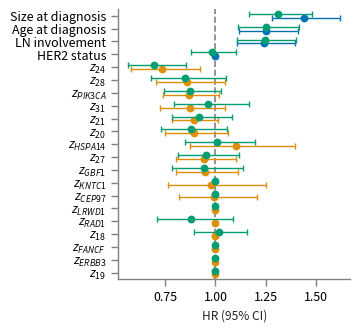

In [8]:
import matplotlib.transforms as transforms

f, ax = plt.subplots(1, 1, figsize=(3, 3.5))
ax.axvline(x=1.0, linestyle="--", c="grey")

pal = sns.color_palette("colorblind")

plot_seed = 40

names_map = {
    "HER2": "HER2 status",
    "ER": "ER status",
    "Size.mm": "Size at diagnosis",
    "Age": "Age at diagnosis",
    "LN": "LN involvement",
    "Grade": "Grade",
}

trans2 = transforms.Affine2D().translate(0.0, +0.15) + ax.transData
trans1 = transforms.Affine2D().translate(0.0, +0.15) + ax.transData
trans3 = transforms.Affine2D().translate(0.0, -0.15) + ax.transData
trans = [trans1, trans2, trans3]

hr_df["lower_ci"] = (np.exp(hr_df["cis_lower"]) - hr_df["hrs"]).abs()
hr_df["upper_ci"] = (np.exp(hr_df["cis_upper"]) - hr_df["hrs"]).abs()

hr_df_mean = hr_df  # .groupby(["rep_type", "model_type", "feat_sets", "dataset", "feat"]).mean().reset_index()


for i, model in enumerate(["Clinical", "Rep", "Clinical+Rep"]):
    hr_df_plot = hr_df_mean[hr_df_mean["feat_sets"] == model]
    hr_df_plot = hr_df_plot[hr_df_plot["seed"] == plot_seed]
    hr_df_plot = hr_df_plot[hr_df_plot["rep_type"] == "PiCo"].sort_values(
        "coeffs", key=abs, ascending=False
    )

    print(hr_df_plot)
    palette = {model: pal[i]}

    sns.pointplot(
        hr_df_plot,
        x="hrs",
        y="feat",
        hue="feat_sets",
        hue_order=[model],
        linestyle="",
        markersize=4,
        capsize=0.25,
        err_kws={"linewidth": 1},
        palette=palette,
        transform=trans[i],
        legend=False,
    )
    ax.errorbar(
        x=hr_df_plot["hrs"],
        y=hr_df_plot["feat"],
        xerr=hr_df_plot[["lower_ci", "upper_ci"]].transpose(),
        fmt="none",
        capsize=2,
        elinewidth=1,
        ecolor=pal[i],
        transform=trans[i],
    )


ax.set_xlabel("HR (95% CI)")
ax.set_ylabel("")
sns.despine()
ax.set_ylim(20.5, -0.5)
ax.tick_params(
    top=False,
    bottom=True,
    left=True,
    right=False,
    labelleft=True,
    labelbottom=True,
    labelsize=10,
)


plt.savefig(
    f"{wd_path}/results_analysis/figures/scanb/cox_hr_sel_s{plot_seed}.svg",
    bbox_inches="tight",
)
plt.savefig(
    f"{wd_path}/results_analysis/figures/scanb/cox_hr_sel_s{plot_seed}.png",
    bbox_inches="tight",
    dpi=600,
)

Index(['$z_{PPM1D}$', '$z_{PIK3CA}$', '$z_{26}$', '$z_{23}$', '$z_{HSPA14}$',
       '$z_{30}$', '$z_{27}$', '$z_{MCL1}$', '$z_{CEP97}$', 'HER2 status',
       '$z_{31}$', '$z_{ERBB3}$', '$z_{RAD1}$', 'Age at diagnosis',
       'LN involvement', 'Size at diagnosis'],
      dtype='object', name='feat')
          coeffs       hrs  cis_lower  cis_upper               feat rep_type  \
0  -2.919908e-02  0.971223  -0.282987   0.224589         $z_{MCL1}$     PiCo   
3  -5.446405e-02  0.946993  -0.386114   0.277186         $z_{RAD1}$     PiCo   
4  -7.086591e-08  1.000000  -0.000321   0.000320        $z_{PPM1D}$     PiCo   
6   2.430875e-01  1.275180   0.009437   0.476738       $z_{HSPA14}$     PiCo   
11 -4.010310e-01  0.669629  -0.758834  -0.043229        $z_{CEP97}$     PiCo   
..           ...       ...        ...        ...                ...      ...   
31 -4.758658e-02  0.953528  -0.180134   0.084961           $z_{31}$     PiCo   
32  2.396691e-01  1.270829   0.120230   0.359108   Age at

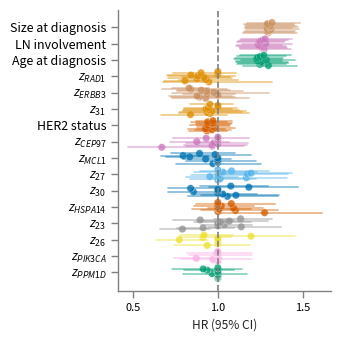

In [9]:
import seaborn as sns

df_filtered = hr_df[
    (hr_df["model_type"] == "CoxPH")
    & (hr_df["feat_sets"] == "Clinical+Rep")  # or 'Rep', 'Clinical+Rep'
    & (hr_df["dataset"] == "test")
    & (hr_df["rep_type"] == "PiCo")
]
# Sort features by average HR for better visual order
feature_order = (
    (df_filtered.groupby("feat")["hrs"].median() - 1).abs().sort_values().index
)[-16:]

print(feature_order)

df_filtered = df_filtered[df_filtered["feat"].isin(feature_order)]
print(df_filtered)

df_filtered["feat_idx"] = df_filtered["feat"].apply(
    lambda x: list(feature_order).index(x)
)

# Sample data simulating your structure for 5 features across 3 seeds

# Create the plot using seaborn and matplotlib
# Recalculate the correct vertical position for each CI line and point
# We'll use a consistent numeric y-position for each point within each feature group

# Create consistent y positions for CI and points with jitter per seed

# Generate distinct colors for each feature
unique_feats = df_filtered["feat"].unique()
palette = sns.color_palette("colorblind", len(unique_feats))
feat_colors = {feat: palette[i] for i, feat in enumerate(unique_feats)}

# Assign numeric base y-position per feature
df_filtered["base_y"] = df_filtered["feat"].apply(
    lambda x: list(feature_order).index(x)
)

# Apply consistent jitter for each seed
seeds = sorted(df_filtered["seed"].unique())
seed_offsets = {seed: (i - len(seeds) / 2) * 0.07 for i, seed in enumerate(seeds)}
df_filtered["y_pos"] = df_filtered.apply(
    lambda row: row["base_y"] + seed_offsets[row["seed"]], axis=1
)

# Plot with corrected CI line placement
fig, ax = plt.subplots(figsize=(3.5, 3.5))

# Plot CI lines manually at correct vertical positions
for _, row in df_filtered.iterrows():
    upper = row["upper_ci"] + row["hrs"]
    lower = -row["lower_ci"] + row["hrs"]
    color = feat_colors[row["feat"]]
    ax.plot([lower, upper], [row["y_pos"]] * 2, color=color, alpha=0.5)

# Overlay HR points
sns.scatterplot(
    data=df_filtered,
    x="hrs",
    y="y_pos",
    hue="feat",
    palette=feat_colors,
    legend=False,
    ax=ax,
    s=30,
    alpha=0.8,
)

# Format axes
ax.set_yticks(range(len(feature_order)))
ax.set_yticklabels(feature_order, fontsize=10)
ax.axvline(1.0, color="grey", linestyle="--")  # HR = 1 reference line
ax.set_xlabel("HR (95% CI)")
ax.set_title("")
ax.set_ylabel("")
sns.despine(ax=ax)
plt.tight_layout()
# plt.show()
plt.savefig(
    f"{wd_path}/results_analysis/figures/scanb/cox_hr_Clinical_Rep_all.png",
    dpi=1200,
    bbox_inches="tight",
)
plt.savefig(
    f"{wd_path}/results_analysis/figures/scanb/cox_hr_Clinical_Rep_all.svg",
    bbox_inches="tight",
)

In [17]:
df_filtered_report = df_filtered[
    df_filtered["feat"].isin([rf"$z_{{{'RAD1'}}}$", rf"$z_{{{'ERBB3'}}}$"])
]
df_filtered_report["upper"] = df_filtered_report["hrs"] + df_filtered_report["upper_ci"]
df_filtered_report["lower"] = df_filtered_report["hrs"] - df_filtered_report["lower_ci"]
# df_filtered_report["sig"] = ((df_filtered_report["upper"] < 1.0) and (df_filtered_report["lower"] < 1.0)) or ((df_filtered_report["upper"] > 1.0) and (df_filtered_report["lower"] > 1.0))
df_filtered_report.groupby(
    ["feat", "rep_type", "model_type", "feat_sets", "dataset"]
).mean()

/tmp/ipykernel_2095346/1079948665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_report["upper"] = df_filtered_report["hrs"] + df_filtered_report["upper_ci"]
/tmp/ipykernel_2095346/1079948665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_report["lower"] = df_filtered_report["hrs"] - df_filtered_report["lower_ci"]


,,,,,coeffs,hrs,cis_lower,cis_upper,seed,lower_ci,upper_ci,feat_idx,base_y,y_pos,upper,lower
feat,rep_type,model_type,feat_sets,dataset,,,,,,,,,,,,
$z_{ERBB3}$,PiCo,CoxPH,Clinical+Rep,test,-0.094238,0.911526,-0.279020,0.090545,55.0,0.150739,0.187009,11.0,11.0,10.965,1.098535,0.760787
$z_{RAD1}$,PiCo,CoxPH,Clinical+Rep,test,-0.096437,0.910022,-0.263891,0.071017,55.0,0.134063,0.167619,12.0,12.0,11.965,1.077641,0.775960


## 5.2 Representation associations with survival

### 5.2.1 Kaplan-Meier plot

{'target': 'BCFi', 'dataset': 'depmap_gdsc_scanb_tcga', 'enc': 'iCoVAE', 'reg': 'CoxPH', 'constraints': ['MCL1', 'PSMC1', 'FANCF', 'RAD1', 'PPM1D', 'SMU1', 'HSPA14', 'GBF1', 'MDM4', 'KNTC1', 'LRWD1', 'CEP97', 'ERBB2', 'ERBB3', 'EGFR', 'PIK3CA'], 'confounders': ['AGE', 'ER', 'HER2', 'LN', 'SIZE'], 'duration_event': ['MONTHS', 'STATUS'], 'strata': ['ER'], 'seed': 10, 'data_dir': './data', 'norm': False, 'lindec': False, 'filt': 'uni_var', 'experiment': 'tcga', 'cuda': False, 'norep': False, 'newstudy': False, 'enc_path': '/home/dk538/rds/hpc-work/graphdep/data/outputs/depmap_gdsc_scanb_tcga/BCFi/tcga/icovae_MCL1_16', 'test_samples': ['TCGA-3C-AALI', 'TCGA-3C-AALJ', 'TCGA-3C-AALK', 'TCGA-4H-AAAK', 'TCGA-5T-A9QA', 'TCGA-A1-A0SB', 'TCGA-A1-A0SD', 'TCGA-A1-A0SE', 'TCGA-A1-A0SF', 'TCGA-A1-A0SG', 'TCGA-A1-A0SH', 'TCGA-A1-A0SI', 'TCGA-A1-A0SJ', 'TCGA-A1-A0SK', 'TCGA-A1-A0SM', 'TCGA-A1-A0SN', 'TCGA-A1-A0SO', 'TCGA-A1-A0SQ', 'TCGA-A2-A04N', 'TCGA-A2-A04P', 'TCGA-A2-A04T', 'TCGA-A2-A04U', 'TCGA-A2

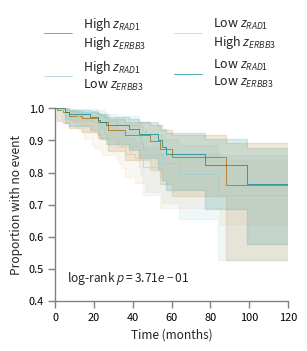

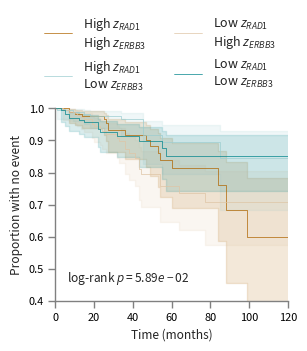

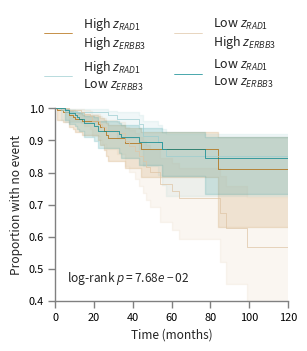

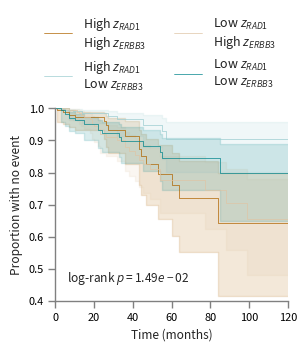

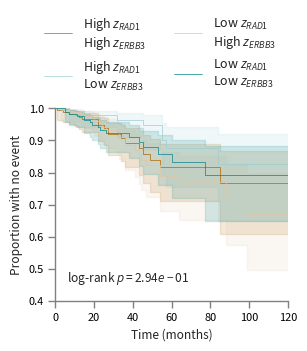

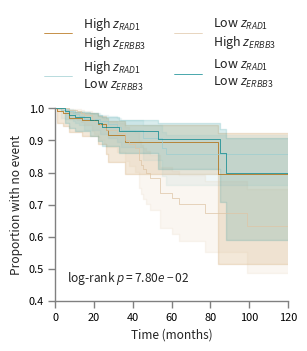

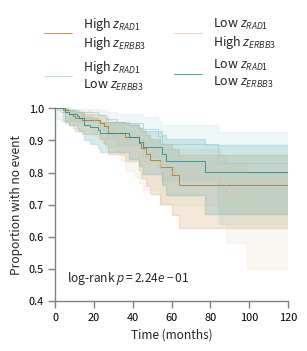

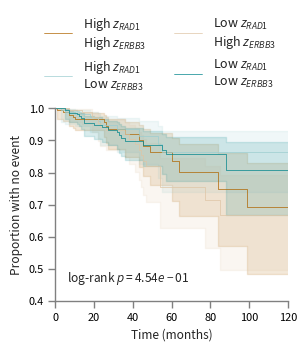

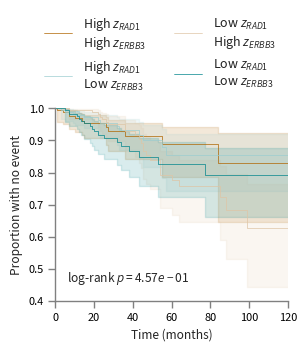

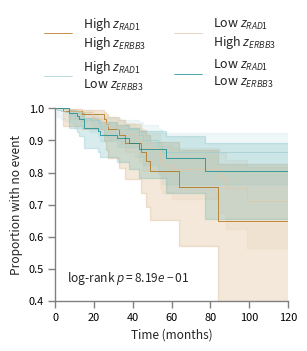

In [26]:
# KM PLOTS FOR 2 VARIABLES
import lifelines as ll
from lifelines.statistics import logrank_test, multivariate_logrank_test
from matplotlib.colors import rgb_to_hsv
import json
from functools import partial
from utils.comp_utils import rep_renamer

plot_dims = ["z_RAD1", "z_ERBB3"]
threshold = 0.5

feat_set = ["Rep"]
ext = "_MCL1_16_AGE_5"
rep_type = "icovae"
model_type = "CoxPH"
val = True

for seed in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    # try:
    with open(
        f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/BCFi/tcga/pico/{model_type}_{rep_type + ext}/regressor_s{seed}.txt"
    ) as reg_model:
        curr_hr_df = pd.DataFrame(json.load(reg_model))

    # LOAD ARGUMENTS
    with open(
        f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/BCFi/tcga/pico/{model_type}_{rep_type + ext}/args_best_s{seed}.txt",
        "r",
    ) as f:
        args = json.load(f)
    print(args)
    constraints = args["constraints"]
    n_constraints = len(constraints)
    confounders = args["confounders"]
    strata = args["strata"]
    # Load z preds to get feature names
    if val:
        curr_z_pred = pd.read_csv(
            f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/BCFi/tcga/pico/{model_type}_{rep_type + ext}/z_pred_test_s{seed}.csv"
        )
    else:
        curr_z_pred = pd.read_csv(
            f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/BCFi/tcga/pico/{model_type}_{rep_type + ext}/z_pred_train_s{seed}.csv"
        )
    curr_z_pred_z = curr_z_pred.iloc[:, curr_z_pred.columns.str.startswith("z")]
    curr_z_pred_c = curr_z_pred.iloc[:, curr_z_pred.columns.str.startswith("c")]

    curr_z_pred_z = curr_z_pred_z.rename(
        mapper=partial(rep_renamer, constraints=constraints, prefix="z"), axis=1
    )
    curr_z_pred_c = curr_z_pred_c.rename(
        mapper=partial(rep_renamer, constraints=confounders, prefix="c"), axis=1
    )

    # Filter for selected variables
    curr_z_pred_z = curr_z_pred_z.loc[:, plot_dims]

    plot_dim_0, plot_dim_1 = plot_dims
    # Find median of these samples to avoid bias
    threshold_lower_0 = curr_z_pred_z[plot_dim_0].quantile(threshold)
    threshold_lower_1 = curr_z_pred_z[plot_dim_1].quantile(threshold)
    # threshold_higher = results_df[plot_dim].quantile(1 - threshold)

    ## Survival analysis based on predictions of tamoxifen sensitivity
    map_uu = curr_z_pred[
        (curr_z_pred_z[plot_dim_0] < threshold_lower_0)
        & (curr_z_pred_z[plot_dim_1] < threshold_lower_1)
    ].dropna(axis=0)
    map_uo = curr_z_pred[
        (curr_z_pred_z[plot_dim_0] < threshold_lower_0)
        & (curr_z_pred_z[plot_dim_1] > threshold_lower_1)
    ].dropna(axis=0)
    map_ou = curr_z_pred[
        (curr_z_pred_z[plot_dim_0] > threshold_lower_0)
        & (curr_z_pred_z[plot_dim_1] < threshold_lower_1)
    ].dropna(axis=0)
    map_oo = curr_z_pred[
        (curr_z_pred_z[plot_dim_0] > threshold_lower_0)
        & (curr_z_pred_z[plot_dim_1] > threshold_lower_1)
    ].dropna(axis=0)

    kmf = ll.KaplanMeierFitter()

    T_uu = map_uu["MONTHS"].astype(float)
    T_uo = map_uo["MONTHS"].astype(float)
    T_ou = map_ou["MONTHS"].astype(float)
    T_oo = map_oo["MONTHS"].astype(float)
    C_uu = map_uu["STATUS"]
    C_uo = map_uo["STATUS"]
    C_ou = map_ou["STATUS"]
    C_oo = map_oo["STATUS"]

    fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))

    x_max = int(np.ceil(max([max(T_uu), max(T_oo), max(T_ou), max(T_uo)])))

    col_test_split_0 = plot_dim_0.split("_")
    if len(col_test_split_0) > 1:
        col_test_plot_0 = f"${col_test_split_0[0]}_{{{col_test_split_0[1]}}}$"
    else:
        col_test_plot_0 = f"${col_test_split_0[0]}$ exp."

    col_test_split_1 = plot_dim_1.split("_")
    if len(col_test_split_1) > 1:
        col_test_plot_1 = f"${col_test_split_1[0]}_{{{col_test_split_1[1]}}}$"
    else:
        col_test_plot_1 = f"${col_test_split_1[0]}$ exp."

    pal = sns.color_palette("colorblind")
    pal = sns.diverging_palette(
        rgb_to_hsv(pal[0])[0] * 359,
        rgb_to_hsv(pal[1])[0] * 359,
        s=100,
        center="light",
        as_cmap=True,
    )

    kmf = ll.KaplanMeierFitter()
    t = np.linspace(0, x_max, x_max + 1)
    kmf.fit(
        T_oo,
        event_observed=C_oo,
        timeline=t,
        label=f"High {col_test_plot_0}\nHigh {col_test_plot_1}",
    )
    kmf.plot_survival_function(ax=ax, ci_alpha=0.15, **{"lw": 0.5, "color": pal(1.0)})

    kmf = ll.KaplanMeierFitter()
    t = np.linspace(0, x_max, x_max + 1)
    kmf.fit(
        T_ou,
        event_observed=C_ou,
        timeline=t,
        label=f"High {col_test_plot_0}\nLow {col_test_plot_1}",
    )
    kmf.plot_survival_function(ax=ax, ci_alpha=0.15, **{"lw": 0.5, "color": pal(0.33)})

    kmf = ll.KaplanMeierFitter()
    t = np.linspace(0, x_max, x_max + 1)
    kmf.fit(
        T_uo,
        event_observed=C_uo,
        timeline=t,
        label=f"Low {col_test_plot_0}\nHigh {col_test_plot_1}",
    )
    kmf.plot_survival_function(ax=ax, ci_alpha=0.15, **{"lw": 0.5, "color": pal(0.66)})

    kmf = ll.KaplanMeierFitter()
    t = np.linspace(0, x_max, x_max + 1)
    kmf.fit(
        T_uu,
        event_observed=C_uu,
        timeline=t,
        label=f"Low {col_test_plot_0}\nLow {col_test_plot_1}",
    )
    kmf.plot_survival_function(ax=ax, ci_alpha=0.15, **{"lw": 0.5, "color": pal(0.0)})

    all_durations = pd.concat([T_oo, T_ou, T_uo, T_uu], axis=0)
    groups = [1] * len(T_oo) + [2] * len(T_ou) + [3] * len(T_uo) + [4] * len(T_uu)
    all_events = pd.concat([C_oo, C_ou, C_uo, C_uu], axis=0)

    results = multivariate_logrank_test(
        event_durations=all_durations,
        groups=groups,
        event_observed=all_events,
        alpha=0.95,
    )
    print(results.p_value)

    # ax.set_title(f"{event}\n"
    # f"{type_select} (n={n_samp})\n"
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.legend(
        handles=handles,
        bbox_to_anchor=(0.45, 1.55),
        loc="upper center",
        frameon=False,
        ncol=2,
        fontsize=10,
    )
    ax.text(
        s=f"log-rank $p = {results.p_value:.2e}$",
        x=0.05,
        y=0.1,
        transform=ax.transAxes,
    )
    sns.despine()
    ax.set_xlabel("Time (months)")
    ax.set_ylabel("Proportion with no event")
    ax.set_xlim(0, 120)
    ax.set_ylim(0.4, 1)
    ax.grid(False)
    # plt.legend('',frameon=False)
    plt.savefig(
        f"{wd_path}/results_analysis/figures/scanb/km_{plot_dim_0}_{plot_dim_1}_s{seed}_{'val' if val else 'train'}.png",
        bbox_inches="tight",
        dpi=600,
    )  # , transparent=True)
    plt.savefig(
        f"{wd_path}/results_analysis/figures/scanb/km_{plot_dim_0}_{plot_dim_1}_s{seed}_{'val' if val else 'train'}.svg",
        bbox_inches="tight",
    )  # , transparent=True)

{'target': 'BCFi', 'dataset': 'depmap_gdsc_scanb_tcga', 'enc': 'iCoVAE', 'reg': 'CoxPH', 'constraints': ['MCL1', 'PSMC1', 'FANCF', 'RAD1', 'PPM1D', 'SMU1', 'HSPA14', 'GBF1', 'MDM4', 'KNTC1', 'LRWD1', 'CEP97', 'ERBB2', 'ERBB3', 'EGFR', 'PIK3CA'], 'confounders': ['AGE', 'ER', 'HER2', 'LN', 'SIZE'], 'duration_event': ['MONTHS', 'STATUS'], 'strata': ['ER'], 'seed': 10, 'data_dir': './data', 'norm': False, 'lindec': False, 'filt': 'uni_var', 'experiment': 'tcga', 'cuda': False, 'norep': False, 'newstudy': False, 'enc_path': '/home/dk538/rds/hpc-work/graphdep/data/outputs/depmap_gdsc_scanb_tcga/BCFi/tcga/icovae_MCL1_16', 'test_samples': ['TCGA-3C-AALI', 'TCGA-3C-AALJ', 'TCGA-3C-AALK', 'TCGA-4H-AAAK', 'TCGA-5T-A9QA', 'TCGA-A1-A0SB', 'TCGA-A1-A0SD', 'TCGA-A1-A0SE', 'TCGA-A1-A0SF', 'TCGA-A1-A0SG', 'TCGA-A1-A0SH', 'TCGA-A1-A0SI', 'TCGA-A1-A0SJ', 'TCGA-A1-A0SK', 'TCGA-A1-A0SM', 'TCGA-A1-A0SN', 'TCGA-A1-A0SO', 'TCGA-A1-A0SQ', 'TCGA-A2-A04N', 'TCGA-A2-A04P', 'TCGA-A2-A04T', 'TCGA-A2-A04U', 'TCGA-A2

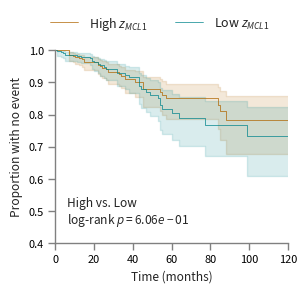

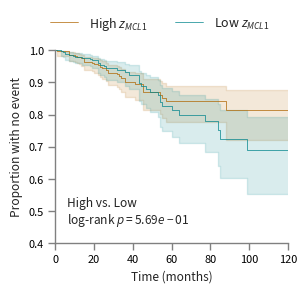

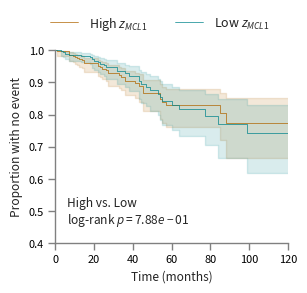

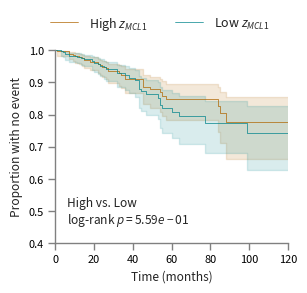

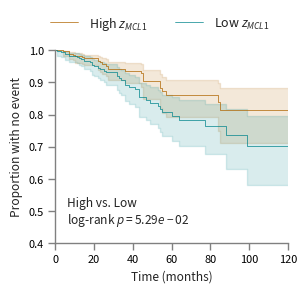

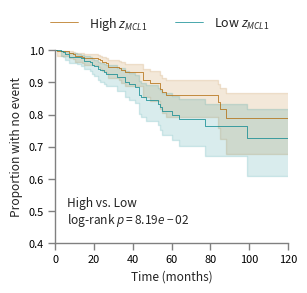

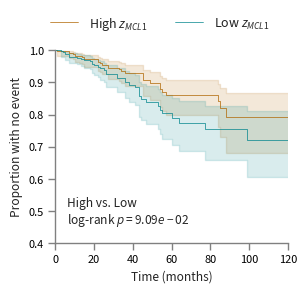

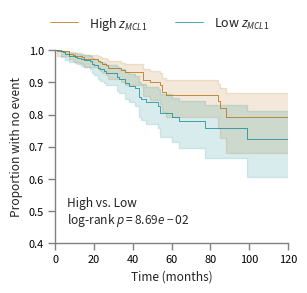

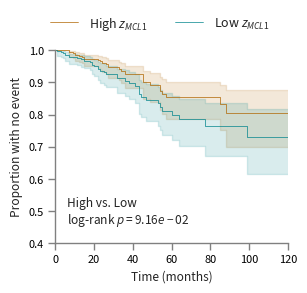

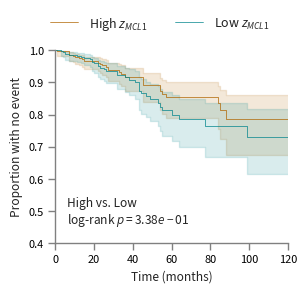

In [18]:
# KM PLOTS FOR 1 VARIABLE
import lifelines as ll
from matplotlib.colors import rgb_to_hsv
import json
from functools import partial
from utils.comp_utils import rep_renamer

plot_dims = ["z_MCL1"]
threshold = 0.50

feat_set = ["Rep"]
ext = "_MCL1_16_AGE_5"
rep_type = "icovae"
model_type = "CoxPH"
val = True

for seed in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    # try:
    with open(
        f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/BCFi/tcga/pico/{model_type}_{rep_type + ext}/regressor_s{seed}.txt"
    ) as reg_model:
        curr_hr_df = pd.DataFrame(json.load(reg_model))

    # LOAD ARGUMENTS
    with open(
        f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/BCFi/tcga/pico/{model_type}_{rep_type + ext}/args_best_s{seed}.txt",
        "r",
    ) as f:
        args = json.load(f)
    print(args)
    constraints = args["constraints"]
    n_constraints = len(constraints)
    confounders = args["confounders"]
    strata = args["strata"]
    # Load z preds to get feature names
    if val:
        curr_z_pred = pd.read_csv(
            f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/BCFi/tcga/pico/{model_type}_{rep_type + ext}/z_pred_test_s{seed}.csv"
        )
    else:
        curr_z_pred = pd.read_csv(
            f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/BCFi/tcga/pico/{model_type}_{rep_type + ext}/z_pred_train_s{seed}.csv"
        )
    curr_z_pred_z = curr_z_pred.iloc[:, curr_z_pred.columns.str.startswith("z")]
    curr_z_pred_c = curr_z_pred.iloc[:, curr_z_pred.columns.str.startswith("c")]

    curr_z_pred_z = curr_z_pred_z.rename(
        mapper=partial(rep_renamer, constraints=constraints, prefix="z"), axis=1
    )
    curr_z_pred_c = curr_z_pred_c.rename(
        mapper=partial(rep_renamer, constraints=confounders, prefix="c"), axis=1
    )

    # Filter for selected variables
    curr_z_pred_z = curr_z_pred_z.loc[:, plot_dims]

    plot_dim_0 = plot_dims[0]
    # Find median of these samples to avoid bias
    threshold_lower_0 = curr_z_pred_z[plot_dim_0].quantile(threshold)
    # threshold_higher = results_df[plot_dim].quantile(1 - threshold)

    ## Survival analysis based on predictions of tamoxifen sensitivity
    map_u = curr_z_pred[(curr_z_pred_z[plot_dim_0] < threshold_lower_0)].dropna(axis=0)
    map_o = curr_z_pred[(curr_z_pred_z[plot_dim_0] > threshold_lower_0)].dropna(axis=0)

    kmf = ll.KaplanMeierFitter()

    T_u = map_u["MONTHS"].astype(float)
    T_o = map_o["MONTHS"].astype(float)

    C_u = map_u["STATUS"]
    C_o = map_o["STATUS"]

    fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))

    x_max = int(np.ceil(max([max(T_u), max(T_o)])))

    col_test_split_0 = plot_dim_0.split("_")
    if len(col_test_split_0) > 1:
        col_test_plot_0 = f"${col_test_split_0[0]}_{{{col_test_split_0[1]}}}$"
    else:
        col_test_plot_0 = f"${col_test_split_0[0]}$ exp."

    pal = sns.color_palette("colorblind")
    pal = sns.diverging_palette(
        rgb_to_hsv(pal[0])[0] * 359,
        rgb_to_hsv(pal[1])[0] * 359,
        s=100,
        center="light",
        as_cmap=True,
    )

    kmf = ll.KaplanMeierFitter()
    t = np.linspace(0, x_max, x_max + 1)
    kmf.fit(T_o, event_observed=C_o, timeline=t, label=f"High {col_test_plot_0}")
    kmf.plot_survival_function(ax=ax, ci_alpha=0.15, **{"lw": 0.5, "color": pal(1.0)})

    kmf = ll.KaplanMeierFitter()
    t = np.linspace(0, x_max, x_max + 1)
    kmf.fit(T_u, event_observed=C_u, timeline=t, label=f"Low {col_test_plot_0}")
    kmf.plot_survival_function(ax=ax, ci_alpha=0.15, **{"lw": 0.5, "color": pal(0.0)})

    results = logrank_test(T_o, T_u, C_o, C_u, alpha=0.95)

    # ax.set_title(f"{event}\n"
    # f"{type_select} (n={n_samp})\n"
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.legend(
        handles=handles,
        bbox_to_anchor=(0.45, 1.25),
        loc="upper center",
        frameon=False,
        ncol=2,
        fontsize=10,
    )
    ax.text(
        s=f"High vs. Low\nlog-rank $p = {results.p_value:.2e}$",
        x=0.05,
        y=0.1,
        transform=ax.transAxes,
    )
    sns.despine()
    ax.set_xlabel("Time (months)")
    ax.set_ylabel("Proportion with no event")
    ax.set_xlim(0, 120)
    ax.set_ylim(0.4, 1)
    ax.grid(False)
    # plt.legend('',frameon=False)
    plt.savefig(
        f"{wd_path}/results_analysis/figures/scanb/km_{plot_dim_0}_s{seed}_{'val' if val else 'train'}.png",
        bbox_inches="tight",
        dpi=600,
    )  # , transparent=True)
    plt.savefig(
        f"{wd_path}/results_analysis/figures/scanb/km_{plot_dim_0}_s{seed}_{'val' if val else 'train'}.svg",
        bbox_inches="tight",
    )  # , transparent=True)

In [62]:
def plot_km(
    self,
    type_select: str,
    plot_dims: tuple,
    event: str,
    rep_type: str,
    seed: int,
    threshold=0.5,
) -> None:
    # merge dfs
    if self.dataset == "SCANB":
        results_df = pd.concat(
            [
                results_df,
                self.scanb_all.reset_index().iloc[results_df.index][
                    [f"{event}_days", f"{event}_event"]
                ],
            ],
            axis=1,
        ).dropna(axis=0)
        e_sfx = "event"
        # CREATE COLUMN FOR MONTHS
        results_df[f"{event}_months"] = results_df[f"{event}_days"] / 30
        t_sfx = "months"
        results_df = pd.concat(
            [results_df, self.exp.reset_index().iloc[results_df.index]], axis=1
        )
    elif self.dataset == "METABRIC":
        print(
            self.metabric_all.loc[self.exp.index][
                [f"{event}_MONTHS", f"{event}_STATUS"]
            ]
        )
        results_df = pd.concat(
            [
                results_df,
                self.metabric_all.loc[self.exp.index][
                    [f"{event}_MONTHS", f"{event}_STATUS"]
                ].reset_index(),
            ],
            axis=1,
        ).dropna(axis=0)
        results_df[f"{event}_STATUS"] = results_df[f"{event}_STATUS"].apply(
            lambda x: x.split(":")[0]
        )
        t_sfx = "MONTHS"
        e_sfx = "STATUS"

    n_samp = len(results_df)
    print(f"Number of samples: {n_samp}")

    if len(plot_dims) == 1:
        plot_dim = plot_dims[0]
        # Find median of these samples to avoid bias
        threshold_lower = results_df[plot_dim].quantile(threshold)
        # threshold_higher = results_df[plot_dim].quantile(1 - threshold)

        ## Survival analysis based on predictions of tamoxifen sensitivity
        map_under = results_df[results_df[plot_dim] < threshold_lower]
        map_over = results_df[results_df[plot_dim] > threshold_lower]

        kmf = ll.KaplanMeierFitter()

        T_over = map_over[f"{event}_{t_sfx}"].astype(float)
        C_over = map_over[f"{event}_{e_sfx}"]
        T_under = map_under[f"{event}_{t_sfx}"].astype(float)
        C_under = map_under[f"{event}_{e_sfx}"]

        fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5))

        x_max = int(np.ceil(max([max(T_over), max(T_under)])))

        col_test_split = plot_dim.split("_")
        col_test_plot = f"${col_test_split[0]}_{{{col_test_split[1]}}}$"

        pal = sns.color_palette("colorblind")
        pal = sns.diverging_palette(
            rgb_to_hsv(pal[0])[0] * 359,
            rgb_to_hsv(pal[1])[0] * 359,
            s=100,
            center="light",
            as_cmap=True,
        )

        kmf = ll.KaplanMeierFitter()
        t = np.linspace(0, x_max, x_max + 1)
        kmf.fit(
            T_over, event_observed=C_over, timeline=t, label=f"High {col_test_plot}"
        )
        kmf.plot_survival_function(
            ax=ax, ci_alpha=0.15, **{"lw": 0.5, "color": pal(0.75)}
        )

        kmf = ll.KaplanMeierFitter()
        kmf.fit(
            T_under, event_observed=C_under, timeline=t, label=f"Low {col_test_plot}"
        )
        kmf.plot_survival_function(
            ax=ax, ci_alpha=0.15, **{"lw": 0.5, "color": pal(0.25)}
        )

        results = logrank_test(T_over, T_under, C_over, C_under, alpha=0.95)
        # ax.text(0.5 * x_max, 0.98, f"log-rank p = {results.p_value:.2e}")

        # ax.set_title(f"{event}\n"
        # f"{type_select} (n={n_samp})\n"
        handles, labels = plt.gca().get_legend_handles_labels()
        ax.legend(
            handles=handles,
            bbox_to_anchor=(0.45, 1.15),
            loc="upper center",
            frameon=False,
            ncol=2,
            fontsize=9,
        )
        ax.text(
            s=f"log-rank p = {results.p_value:.2e}",
            x=0.1,
            y=0.1,
            transform=ax.transAxes,
        )
        sns.despine()
        ax.set_xlabel("Time (months)")
        ax.set_ylabel("Proportion with no event")
        ax.set_xlim(0, max(max(T_over), max(T_under)))
        ax.grid(False)
        # plt.legend('',frameon=False)
        plt.savefig(
            f"{self.local_path}/{event}_{plot_dim}_km_{threshold}_{type_select}.png",
            bbox_inches="tight",
            dpi=600,
        )  # , transparent=True)
        plt.savefig(
            f"{self.local_path}/{event}_{plot_dim}_km_{threshold}_{type_select}.svg",
            bbox_inches="tight",
        )  # , transparent=True)

    else:
        plot_dim_0, plot_dim_1 = plot_dims
        # Find median of these samples to avoid bias
        threshold_lower_0 = results_df[plot_dim_0].quantile(threshold)
        threshold_lower_1 = results_df[plot_dim_1].quantile(threshold)
        # threshold_higher = results_df[plot_dim].quantile(1 - threshold)

        ## Survival analysis based on predictions of tamoxifen sensitivity
        map_uu = results_df[
            (results_df[plot_dim_0] < threshold_lower_0)
            & (results_df[plot_dim_1] < threshold_lower_1)
        ]
        map_uo = results_df[
            (results_df[plot_dim_0] < threshold_lower_0)
            & (results_df[plot_dim_1] > threshold_lower_1)
        ]
        map_ou = results_df[
            (results_df[plot_dim_0] > threshold_lower_0)
            & (results_df[plot_dim_1] < threshold_lower_1)
        ]
        map_oo = results_df[
            (results_df[plot_dim_0] > threshold_lower_0)
            & (results_df[plot_dim_1] > threshold_lower_1)
        ]

        kmf = ll.KaplanMeierFitter()

        T_uu = map_uu[f"{event}_{t_sfx}"].astype(float)
        T_uo = map_uo[f"{event}_{t_sfx}"].astype(float)
        T_ou = map_ou[f"{event}_{t_sfx}"].astype(float)
        T_oo = map_oo[f"{event}_{t_sfx}"].astype(float)
        C_uu = map_uu[f"{event}_{e_sfx}"]
        C_uo = map_uo[f"{event}_{e_sfx}"]
        C_ou = map_ou[f"{event}_{e_sfx}"]
        C_oo = map_oo[f"{event}_{e_sfx}"]

        fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))

        x_max = int(np.ceil(max([max(T_uu), max(T_oo), max(T_ou), max(T_uo)])))

        col_test_split_0 = plot_dim_0.split("_")
        if len(col_test_split_0) > 1:
            col_test_plot_0 = f"${col_test_split_0[0]}_{{{col_test_split_0[1]}}}$"
        else:
            col_test_plot_0 = f"${col_test_split_0[0]}$ exp."

        col_test_split_1 = plot_dim_1.split("_")
        if len(col_test_split_1) > 1:
            col_test_plot_1 = f"${col_test_split_1[0]}_{{{col_test_split_1[1]}}}$"
        else:
            col_test_plot_1 = f"${col_test_split_1[0]}$ exp."

        pal = sns.color_palette("colorblind")
        pal = sns.diverging_palette(
            rgb_to_hsv(pal[0])[0] * 359,
            rgb_to_hsv(pal[1])[0] * 359,
            s=100,
            center="light",
            as_cmap=True,
        )

        kmf = ll.KaplanMeierFitter()
        t = np.linspace(0, x_max, x_max + 1)
        kmf.fit(
            T_oo,
            event_observed=C_oo,
            timeline=t,
            label=f"High {col_test_plot_0}\nHigh {col_test_plot_1}",
        )
        kmf.plot_survival_function(
            ax=ax, ci_alpha=0.15, **{"lw": 0.5, "color": pal(0.0)}
        )

        kmf = ll.KaplanMeierFitter()
        t = np.linspace(0, x_max, x_max + 1)
        kmf.fit(
            T_ou,
            event_observed=C_ou,
            timeline=t,
            label=f"High {col_test_plot_0}\nLow {col_test_plot_1}",
        )
        kmf.plot_survival_function(
            ax=ax, ci_alpha=0.15, **{"lw": 0.5, "color": pal(0.33)}
        )

        kmf = ll.KaplanMeierFitter()
        t = np.linspace(0, x_max, x_max + 1)
        kmf.fit(
            T_uo,
            event_observed=C_uo,
            timeline=t,
            label=f"Low {col_test_plot_0}\nHigh {col_test_plot_1}",
        )
        kmf.plot_survival_function(
            ax=ax, ci_alpha=0.15, **{"lw": 0.5, "color": pal(0.66)}
        )

        kmf = ll.KaplanMeierFitter()
        t = np.linspace(0, x_max, x_max + 1)
        kmf.fit(
            T_uu,
            event_observed=C_uu,
            timeline=t,
            label=f"Low {col_test_plot_0}\nLow {col_test_plot_1}",
        )
        kmf.plot_survival_function(
            ax=ax, ci_alpha=0.15, **{"lw": 0.5, "color": pal(1.0)}
        )

        results = logrank_test(T_oo, T_uu, C_oo, C_uu, alpha=0.95)

        # ax.set_title(f"{event}\n"
        # f"{type_select} (n={n_samp})\n"
        handles, labels = plt.gca().get_legend_handles_labels()
        ax.legend(
            handles=handles,
            bbox_to_anchor=(0.45, 1.45),
            loc="upper center",
            frameon=False,
            ncol=2,
            fontsize=10,
        )
        ax.text(
            s=f"LowLow vs. HighHigh\nlog-rank $p = {results.p_value:.2e}$",
            x=0.05,
            y=0.1,
            transform=ax.transAxes,
        )
        sns.despine()
        ax.set_xlabel("Time (months)")
        ax.set_ylabel("Proportion with no event")
        ax.set_xlim(0, x_max)
        ax.grid(False)
        # plt.legend('',frameon=False)
        plt.savefig(
            f"{self.local_path}/{event}_{plot_dims[0]}_{len(plot_dims)}_km_{threshold}_{type_select}.png",
            bbox_inches="tight",
            dpi=600,
        )  # , transparent=True)
        plt.savefig(
            f"{self.local_path}/{event}_{plot_dims[0]}_{len(plot_dims)}_km_{threshold}_{type_select}.svg",
            bbox_inches="tight",
        )  # , transparent=True)

      Unnamed: 0   z_ITGAV  z_TUBB4B    z_ESR1    z_TP63   z_PSMC1   z_GATA3  \
0              0 -0.593901 -0.604696 -0.201928  0.169509 -1.920102 -0.011307   
1              1 -0.628128 -0.638055  0.043397  0.201677 -1.734397  0.053244   
2              2 -0.488626 -0.652112 -0.009404  0.216374 -1.744825  0.091653   
3              3 -0.596482 -0.680726 -0.090299  0.008082 -1.836224 -0.082488   
4              4 -0.773346 -0.615510 -0.089862  0.014781 -1.932366 -0.015573   
...          ...       ...       ...       ...       ...       ...       ...   
6655        6655 -0.682410 -0.470277 -0.124720  0.025840 -1.717932 -0.002755   
6656        6656 -0.779494 -0.730483 -0.093603  0.006216 -1.958030 -0.035421   
6657        6657 -0.773984 -0.746617 -0.067951  0.024332 -1.984528 -0.030677   
6658        6658 -0.693692 -0.698774 -0.104362 -0.002618 -1.976644 -0.071067   
6659        6659 -0.749884 -0.786362  0.128906  0.113434 -1.720072  0.094570   

       z_KANK4   z_PPM1D       z_8  ...

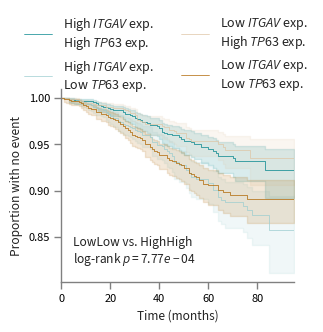

In [122]:
type_select = "All"
event = "BCFi"
rep_type = "sel"
plot_dim_1 = "ITGAV"
plot_dim_2 = "TP63"
seed = 10
surv.plot_km(
    type_select=type_select,
    rep_type=rep_type,
    seed=seed,
    plot_dims=[plot_dim_1, plot_dim_2],
    event=event,
    threshold=0.5,
)

### 5.2.2 Single feature AUROC

In [39]:
# CORRELATION WITH RCB SCORE
import json
from scipy.stats import pointbiserialr, spearmanr
from functools import partial
from sklearn.metrics import auc, roc_curve, roc_auc_score


def rep_renamer(x, constraints, prefix="z"):
    dim = int(x.split("_")[1])
    if dim < len(constraints):
        return f"{prefix}_{constraints[dim]}"
    else:
        return x


rep_type = "icovae_MCL1_16"
target = "BCFi_5Y"
experiment = "tcga"
model_type = "LogisticRegression"


def pbc_corr(x1, x2):
    u_1 = len(np.unique(x1))
    u_2 = len(np.unique(x2))

    if min(u_1, u_2) == 2:
        res = pointbiserialr(x1, x2)
    else:
        res = spearmanr(x1, x2)

    return res[0]


res_root = f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/{target}/{experiment}/pico"
ext = "_AGE_5"

model_path = f"{res_root}/{model_type}_{rep_type + ext}"


corrs = []
corrs_val = []
for seed in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    # LOAD ARGUMENTS
    with open(f"{model_path}/args_best_s{seed}.txt", "r") as f:
        args = json.load(f)

    print(args)

    constraints = args["constraints"]
    n_constraints = len(constraints)
    confounders = args["confounders"]
    if confounders is None:
        n_confounders = 0
    else:
        n_confounders = len(confounders)

    # Load predictions
    test_z = pd.read_csv(f"{model_path}/z_pred_test_s{seed}.csv")
    train_z = pd.read_csv(f"{model_path}/z_pred_train_s{seed}.csv")

    # Rename test df
    test_z_rep_z = test_z.iloc[:, test_z.columns.str.startswith("z")]
    test_z_rep_c = test_z.iloc[:, test_z.columns.str.startswith("c")]
    test_z_rep_y = test_z[["y"]]
    test_z_rep_z = test_z_rep_z.rename(
        mapper=partial(rep_renamer, constraints=constraints, prefix="z"), axis=1
    )
    test_z_rep_c = test_z_rep_c.rename(
        mapper=partial(rep_renamer, constraints=confounders, prefix="c"), axis=1
    )
    test_z_rep_y = test_z_rep_y.rename({"y": target}, axis=1)

    test_z_rep = pd.concat([test_z_rep_z, test_z_rep_c, test_z_rep_y], axis=1).dropna(
        axis=0
    )

    # Rename train df
    train_z_rep_z = train_z.iloc[:, train_z.columns.str.startswith("z")]
    train_z_rep_c = train_z.iloc[:, train_z.columns.str.startswith("c")]
    train_z_rep_y = train_z[["y"]]
    train_z_rep_z = train_z_rep_z.rename(
        mapper=partial(rep_renamer, constraints=constraints, prefix="z"), axis=1
    )
    train_z_rep_c = train_z_rep_c.rename(
        mapper=partial(rep_renamer, constraints=confounders, prefix="c"), axis=1
    )
    train_z_rep_y = train_z_rep_y.rename({"y": target}, axis=1)

    train_z_rep = pd.concat(
        [train_z_rep_z, train_z_rep_c, train_z_rep_y], axis=1
    ).dropna(axis=0)

    for col in train_z_rep.columns:
        if col != target:
            # Calculate AUROC for each subtype
            curr_pred = test_z_rep[[col, target]].dropna()

            auc = roc_auc_score(curr_pred[target], curr_pred[col])
            auc_neg = roc_auc_score(curr_pred[target], -1 * curr_pred[col])
            auc = np.max([auc, auc_neg])

            corrs.append({"feat": col, "seed": seed, "auroc": auc})

    for col in test_z_rep.columns:
        if col != target:
            # Calculate AUROC for each subtype
            curr_pred = train_z_rep[[col, target]].dropna()

            auc = roc_auc_score(curr_pred[target], curr_pred[col])
            auc_neg = roc_auc_score(curr_pred[target], -1 * curr_pred[col])
            auc = np.max([auc, auc_neg])

            corrs_val.append({"feat": col, "seed": seed, "auroc": auc})

{'target': 'BCFi_5Y', 'dataset': 'depmap_gdsc_scanb_tcga', 'enc': 'iCoVAE', 'reg': 'LogisticRegression', 'constraints': ['MCL1', 'PSMC1', 'FANCF', 'RAD1', 'PPM1D', 'SMU1', 'HSPA14', 'GBF1', 'MDM4', 'KNTC1', 'LRWD1', 'CEP97', 'ERBB2', 'ERBB3', 'EGFR', 'PIK3CA'], 'confounders': ['AGE', 'ER', 'HER2', 'LN', 'SIZE'], 'seed': 10, 'data_dir': './data', 'norm': False, 'lindec': False, 'filt': 'uni_var', 'experiment': 'tcga', 'cuda': False, 'norep': False, 'newstudy': False, 'enc_path': '/home/dk538/rds/hpc-work/graphdep/data/outputs/depmap_gdsc_scanb_tcga/BCFi_5Y/tcga/icovae_MCL1_16', 'test_samples': ['TCGA-3C-AALI', 'TCGA-3C-AALJ', 'TCGA-3C-AALK', 'TCGA-4H-AAAK', 'TCGA-5T-A9QA', 'TCGA-A1-A0SB', 'TCGA-A1-A0SD', 'TCGA-A1-A0SE', 'TCGA-A1-A0SF', 'TCGA-A1-A0SG', 'TCGA-A1-A0SH', 'TCGA-A1-A0SI', 'TCGA-A1-A0SJ', 'TCGA-A1-A0SK', 'TCGA-A1-A0SM', 'TCGA-A1-A0SN', 'TCGA-A1-A0SO', 'TCGA-A1-A0SQ', 'TCGA-A2-A04N', 'TCGA-A2-A04P', 'TCGA-A2-A04T', 'TCGA-A2-A04U', 'TCGA-A2-A04V', 'TCGA-A2-A04W', 'TCGA-A2-A04X',

     index            feat  seed     auroc dataset  mean_auroc
35      35  LN involvement    10  0.562637  SCAN-B    0.562637
72      72  LN involvement    20  0.562637  SCAN-B    0.562637
109    109  LN involvement    30  0.562637  SCAN-B    0.562637
146    146  LN involvement    40  0.562637  SCAN-B    0.562637
183    183  LN involvement    50  0.562637  SCAN-B    0.562637
..     ...             ...   ...       ...     ...         ...
219    219     HER2 status    60  0.528738    TCGA    0.528738
256    256     HER2 status    70  0.528738    TCGA    0.528738
293    293     HER2 status    80  0.528738    TCGA    0.528738
330    330     HER2 status    90  0.528738    TCGA    0.528738
367    367     HER2 status   100  0.528738    TCGA    0.528738

[740 rows x 6 columns]


/tmp/ipykernel_2859037/3761531027.py:28: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.pointplot(data=corrs_df, x=metric, y="feat", hue="dataset", ax=ax, errorbar=("sd", 1),
/tmp/ipykernel_2859037/3761531027.py:67: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(
/tmp/ipykernel_2859037/3761531027.py:67: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(


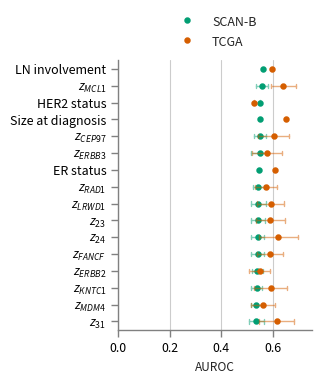

In [40]:
names_map = {
    "AGE": "Age at diagnosis",
    "ER": "ER status",
    "HER2": "HER2 status",
    "LN": "LN involvement",
    "SIZE": "Size at diagnosis",
}

for metric in ["auroc"]:
    palette = sns.color_palette("colorblind")[2:]

    corrs_df_val = pd.DataFrame.from_dict(corrs_val).reset_index()

    corrs_df = pd.DataFrame.from_dict(corrs).reset_index()

    corrs_df_val["dataset"] = "TCGA"
    corrs_df["dataset"] = "SCAN-B"

    corrs_df = pd.concat([corrs_df_val, corrs_df], axis=0)

    corrs_df["mean_auroc"] = (
        corrs_df.groupby(["dataset", "feat"]).transform("mean")["auroc"].astype(float)
    )

    corrs_df["feat"] = corrs_df["feat"].apply(lambda x: x.split("_"))
    corrs_df["feat"] = corrs_df["feat"].apply(
        lambda x: f"$z_{{{x[1]}}}$" if x[0] == "z" else names_map[x[1]]
    )

    corrs_df = corrs_df.sort_values(
        by=["dataset", f"mean_{metric.split('_')[-1]}"],
        key=lambda x: abs(x) if x.dtypes == "float64" else x,
        ascending=[True, False],
    )
    print(corrs_df)

    fig, ax = plt.subplots(1, 1, figsize=(2.5, 3.5))

    sns.pointplot(
        data=corrs_df,
        x=metric,
        y="feat",
        hue="dataset",
        ax=ax,
        errorbar=("sd", 1),
        capsize=0.25,
        linestyle="none",
        markersize=3,
        err_kws={"linewidth": 1, "alpha": 0.5},
        palette=palette,
    )

    if metric == "abs_spearmanr":
        ax.set_xlabel("Abs. Spearman correlation")
    elif metric == "abs_pearsonr":
        ax.set_xlabel("Abs. Pearson correlation")
    elif metric == "spearmanr":
        ax.set_xlabel("Spearman correlation")
    elif metric == "pearsonr":
        ax.set_xlabel("Pearson correlation")
    elif metric == "auroc":
        ax.set_xlabel("AUROC")
        ax.set_xlim(0, 0.75)
    else:
        raise ValueError("Invalid metric")
    ax.set_ylabel("")
    ax.tick_params(
        top=False,
        bottom=True,
        left=True,
        right=False,
        labelleft=True,
        labelbottom=True,
        labelsize=10,
    )
    sns.despine(ax=ax)

    ax.grid(visible=True, axis="x")

    ax.set_ylim(15.5, -0.5)
    ax.axvline(0, c="grey", lw=0.5)

    ax.legend(
        frameon=False,
        title="",
        ncol=1,
        bbox_to_anchor=(0.5, 1.0),
        loc="lower center",
        fontsize=10,
    )  # , labels=["TransNEO", "ARTemis+PBCP"])

    plt.savefig(
        f"./figures/scanb/{metric}_assocs_{rep_type}.svg",
        bbox_inches="tight",
    )
    plt.savefig(
        f"./figures/scanb/{metric}_assocs_{rep_type}.png",
        bbox_inches="tight",
        dpi=600,
    )

In [41]:
corrs_df_val.groupby(["dataset", "feat"]).mean().sort_values("auroc", ascending=False)

index  seed     auroc
dataset feat                           
TCGA    c_SIZE    202.5  55.0  0.652127
        z_MCL1    166.5  55.0  0.640742
        z_29      195.5  55.0  0.622963
        z_24      190.5  55.0  0.620362
        z_SMU1    171.5  55.0  0.619476
        z_17      183.5  55.0  0.615051
        z_31      197.5  55.0  0.614463
        z_EGFR    180.5  55.0  0.612474
        z_30      196.5  55.0  0.610926
        z_19      185.5  55.0  0.609758
        c_ER      199.5  55.0  0.608716
        z_CEP97   177.5  55.0  0.602863
        z_22      188.5  55.0  0.601653
        z_16      182.5  55.0  0.601148
        c_LN      201.5  55.0  0.598061
        z_28      194.5  55.0  0.595168
        z_KNTC1   175.5  55.0  0.591220
        z_LRWD1   176.5  55.0  0.591007
        z_25      191.5  55.0  0.590881
        z_23      189.5  55.0  0.590438
        z_FANCF   168.5  55.0  0.588510
        z_20      186.5  55.0  0.587863
        z_18      184.5  55.0  0.586780
        z_GBF1    173.5  55.0  0.584170
        z_ERBB3   179.5  55.0  0.578120
        z_27      193.5  55.0  0.577288
        z_RAD1    169.5  55.0  0.573084
        z_PSMC1   167.5  55.0  0.572875
        z_26      192.5  55.0  0.571283
        z_PPM1D   170.5  55.0  0.570064
        c_AGE     198.5  55.0  0.569720
        z_HSPA14  172.5  55.0  0.562823
        z_MDM4    174.5  55.0  0.561728
        z_21      187.5  55.0  0.560933
        z_ERBB2   178.5  55.0  0.549921
        z_PIK3CA  181.5  55.0  0.543870
        c_HER2    200.5  55.0  0.528738

In [38]:
corrs_df.groupby(["dataset", "feat"]).mean().sort_values("auroc", ascending=False).head(
    50
)

index  seed     auroc  mean_auroc
dataset feat                                                
TCGA    Size at diagnosis  202.5  55.0  0.652127    0.652127
        $z_{MCL1}$         166.5  55.0  0.640742    0.640742
        $z_{29}$           195.5  55.0  0.622963    0.622963
        $z_{24}$           190.5  55.0  0.620362    0.620362
        $z_{SMU1}$         171.5  55.0  0.619476    0.619476
        $z_{17}$           183.5  55.0  0.615051    0.615051
        $z_{31}$           197.5  55.0  0.614463    0.614463
        $z_{EGFR}$         180.5  55.0  0.612474    0.612474
        $z_{30}$           196.5  55.0  0.610926    0.610926
        $z_{19}$           185.5  55.0  0.609758    0.609758
        ER status          199.5  55.0  0.608716    0.608716
        $z_{CEP97}$        177.5  55.0  0.602863    0.602863
        $z_{22}$           188.5  55.0  0.601653    0.601653
        $z_{16}$           182.5  55.0  0.601148    0.601148
        LN involvement     201.5  55.0  0.598061    0.598061
        $z_{28}$           194.5  55.0  0.595168    0.595168
        $z_{KNTC1}$        175.5  55.0  0.591220    0.591220
        $z_{LRWD1}$        176.5  55.0  0.591007    0.591007
        $z_{25}$           191.5  55.0  0.590881    0.590881
        $z_{23}$           189.5  55.0  0.590438    0.590438
        $z_{FANCF}$        168.5  55.0  0.588510    0.588510
        $z_{20}$           186.5  55.0  0.587863    0.587863
        $z_{18}$           184.5  55.0  0.586780    0.586780
        $z_{GBF1}$         173.5  55.0  0.584170    0.584170
        $z_{ERBB3}$        179.5  55.0  0.578120    0.578120
        $z_{27}$           193.5  55.0  0.577288    0.577288
        $z_{RAD1}$         169.5  55.0  0.573084    0.573084
        $z_{PSMC1}$        167.5  55.0  0.572875    0.572875
        $z_{26}$           192.5  55.0  0.571283    0.571283
        $z_{PPM1D}$        170.5  55.0  0.570064    0.570064
        Age at diagnosis   198.5  55.0  0.569720    0.569720
        $z_{HSPA14}$       172.5  55.0  0.562823    0.562823
SCAN-B  LN involvement     201.5  55.0  0.562637    0.562637
TCGA    $z_{MDM4}$         174.5  55.0  0.561728    0.561728
        $z_{21}$           187.5  55.0  0.560933    0.560933
SCAN-B  $z_{MCL1}$         166.5  55.0  0.557973    0.557973
TCGA    $z_{ERBB2}$        178.5  55.0  0.549921    0.549921
SCAN-B  HER2 status        200.5  55.0  0.549750    0.549750
        Size at diagnosis  202.5  55.0  0.549224    0.549224
        $z_{CEP97}$        177.5  55.0  0.548628    0.548628
        $z_{ERBB3}$        179.5  55.0  0.548426    0.548426
        ER status          199.5  55.0  0.546463    0.546463
TCGA    $z_{PIK3CA}$       181.5  55.0  0.543870    0.543870
SCAN-B  $z_{RAD1}$         169.5  55.0  0.543570    0.543570
        $z_{LRWD1}$        176.5  55.0  0.543289    0.543289
        $z_{23}$           189.5  55.0  0.541124    0.541124
        $z_{24}$           190.5  55.0  0.540878    0.540878
        $z_{FANCF}$        168.5  55.0  0.540572    0.540572
        $z_{ERBB2}$        178.5  55.0  0.540133    0.540133
        $z_{KNTC1}$        175.5  55.0  0.537486    0.537486

In [ ]:
# SINGLE FEATURE AUROC -- BY SUBTYPE
import json
from functools import partial
from sklearn.metrics import auc, roc_curve, roc_auc_score


def rep_renamer(x, constraints, prefix="z"):
    dim = int(x.split("_")[1])
    if dim < len(constraints):
        return f"{prefix}_{constraints[dim]}"
    else:
        return x


rep_type = "icovae_MCL1_16"
target = "BCFi_5Y"
experiment = "tcga"
model_type = "LogisticRegression"


res_root = f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/{target}/{experiment}/pico"
ext = "_AGE_5"

model_path = f"{res_root}/{model_type}_{rep_type + ext}"


corrs = []
corrs_val = []
for seed in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    # LOAD ARGUMENTS
    with open(f"{model_path}/args_best_s{seed}.txt", "r") as f:
        args = json.load(f)

    print(args)

    constraints = args["constraints"]
    n_constraints = len(constraints)
    confounders = args["confounders"]
    if confounders is None:
        n_confounders = 0
    else:
        n_confounders = len(confounders)

    # Load predictions
    test_z = pd.read_csv(f"{model_path}/z_pred_test_s{seed}.csv")
    train_z = pd.read_csv(f"{model_path}/z_pred_train_s{seed}.csv")

    # Rename test df
    test_z_rep_z = test_z.iloc[:, test_z.columns.str.startswith("z")]
    test_z_rep_c = test_z.iloc[:, test_z.columns.str.startswith("c")]
    test_z_rep_y = test_z[["y"]]
    test_z_rep_z = test_z_rep_z.rename(
        mapper=partial(rep_renamer, constraints=constraints, prefix="z"), axis=1
    )
    test_z_rep_c = test_z_rep_c.rename(
        mapper=partial(rep_renamer, constraints=confounders, prefix="c"), axis=1
    )
    test_z_rep_y = test_z_rep_y.rename({"y": target}, axis=1)

    test_z_rep = pd.concat([test_z_rep_z, test_z_rep_c, test_z_rep_y], axis=1).dropna(
        axis=0
    )

    # Rename train df
    train_z_rep_z = train_z.iloc[:, train_z.columns.str.startswith("z")]
    train_z_rep_c = train_z.iloc[:, train_z.columns.str.startswith("c")]
    train_z_rep_y = train_z[["y"]]
    train_z_rep_z = train_z_rep_z.rename(
        mapper=partial(rep_renamer, constraints=constraints, prefix="z"), axis=1
    )
    train_z_rep_c = train_z_rep_c.rename(
        mapper=partial(rep_renamer, constraints=confounders, prefix="c"), axis=1
    )
    train_z_rep_y = train_z_rep_y.rename({"y": target}, axis=1)

    train_z_rep = pd.concat(
        [train_z_rep_z, train_z_rep_c, train_z_rep_y], axis=1
    ).dropna(axis=0)

    curr_preds_00 = train_z_rep[(train_z_rep["c_ER"] < 0) & (train_z_rep["c_HER2"] < 0)]
    curr_preds_10 = train_z_rep[(train_z_rep["c_ER"] > 0) & (train_z_rep["c_HER2"] < 0)]
    curr_preds_01 = train_z_rep[(train_z_rep["c_ER"] < 0) & (train_z_rep["c_HER2"] > 0)]
    curr_preds_11 = train_z_rep[(train_z_rep["c_ER"] > 0) & (train_z_rep["c_HER2"] > 0)]

    curr_preds_test_00 = test_z_rep[
        (test_z_rep["c_ER"] < 0) & (test_z_rep["c_HER2"] < 0)
    ]
    curr_preds_test_10 = test_z_rep[
        (test_z_rep["c_ER"] > 0) & (test_z_rep["c_HER2"] < 0)
    ]
    curr_preds_test_01 = test_z_rep[
        (test_z_rep["c_ER"] < 0) & (test_z_rep["c_HER2"] > 0)
    ]
    curr_preds_test_11 = test_z_rep[
        (test_z_rep["c_ER"] > 0) & (test_z_rep["c_HER2"] > 0)
    ]

    subtype_preds = {
        "ER-/HER2-": (curr_preds_00, curr_preds_test_00),
        "ER+/HER2-": (curr_preds_10, curr_preds_test_10),
        "ER-/HER2+": (curr_preds_01, curr_preds_test_01),
        "ER+/HER2+": (curr_preds_11, curr_preds_test_11),
    }

    for subtype, (train_rep, test_rep) in subtype_preds.items():
        for col in train_rep.columns:
            if col != target:
                # Calculate AUROC for each subtype
                curr_pred = test_rep[[col, target]].dropna()

                auc = roc_auc_score(curr_pred[target], curr_pred[col])
                auc_neg = roc_auc_score(curr_pred[target], -1 * curr_pred[col])
                auc = np.max([auc, auc_neg])

                corrs.append(
                    {"subtype": subtype, "feat": col, "seed": seed, "auroc": auc}
                )

        for col in test_rep.columns:
            if col != target:
                # Calculate AUROC for each subtype
                curr_pred = train_rep[[col, target]].dropna()

                auc = roc_auc_score(curr_pred[target], curr_pred[col])
                auc_neg = roc_auc_score(curr_pred[target], -1 * curr_pred[col])
                auc = np.max([auc, auc_neg])

                corrs_val.append(
                    {"subtype": subtype, "feat": col, "seed": seed, "auroc": auc}
                )

{'target': 'BCFi_5Y', 'dataset': 'depmap_gdsc_scanb_tcga', 'enc': 'iCoVAE', 'reg': 'LogisticRegression', 'constraints': ['MCL1', 'PSMC1', 'FANCF', 'RAD1', 'PPM1D', 'SMU1', 'HSPA14', 'GBF1', 'MDM4', 'KNTC1', 'LRWD1', 'CEP97', 'ERBB2', 'ERBB3', 'EGFR', 'PIK3CA'], 'confounders': ['AGE', 'ER', 'HER2', 'LN', 'SIZE'], 'seed': 10, 'data_dir': './data', 'norm': False, 'lindec': False, 'filt': 'uni_var', 'experiment': 'tcga', 'cuda': False, 'norep': False, 'newstudy': False, 'enc_path': '/home/dk538/rds/hpc-work/graphdep/data/outputs/depmap_gdsc_scanb_tcga/BCFi_5Y/tcga/icovae_MCL1_16', 'test_samples': ['TCGA-3C-AALI', 'TCGA-3C-AALJ', 'TCGA-3C-AALK', 'TCGA-4H-AAAK', 'TCGA-5T-A9QA', 'TCGA-A1-A0SB', 'TCGA-A1-A0SD', 'TCGA-A1-A0SE', 'TCGA-A1-A0SF', 'TCGA-A1-A0SG', 'TCGA-A1-A0SH', 'TCGA-A1-A0SI', 'TCGA-A1-A0SJ', 'TCGA-A1-A0SK', 'TCGA-A1-A0SM', 'TCGA-A1-A0SN', 'TCGA-A1-A0SO', 'TCGA-A1-A0SQ', 'TCGA-A2-A04N', 'TCGA-A2-A04P', 'TCGA-A2-A04T', 'TCGA-A2-A04U', 'TCGA-A2-A04V', 'TCGA-A2-A04W', 'TCGA-A2-A04X',

      level_0  index    subtype               feat  seed     auroc dataset  \
111       111    111  ER+/HER2+         $z_{MCL1}$    10  0.553571  SCAN-B   
112       112    112  ER+/HER2+        $z_{PSMC1}$    10  0.517857  SCAN-B   
113       113    113  ER+/HER2+        $z_{FANCF}$    10  0.625000  SCAN-B   
114       114    114  ER+/HER2+         $z_{RAD1}$    10  0.580357  SCAN-B   
115       115    115  ER+/HER2+        $z_{PPM1D}$    10  0.535714  SCAN-B   
...       ...    ...        ...                ...   ...       ...     ...   
2844     1364   1364  ER-/HER2-   Age at diagnosis   100  0.584579    TCGA   
2845     1365   1365  ER-/HER2-          ER status   100  0.500000    TCGA   
2846     1366   1366  ER-/HER2-        HER2 status   100  0.500000    TCGA   
2847     1367   1367  ER-/HER2-     LN involvement   100  0.632804    TCGA   
2848     1368   1368  ER-/HER2-  Size at diagnosis   100  0.614735    TCGA   

      mean_auroc  
111     0.603571  
112     0.568750  
113   

/tmp/ipykernel_2859037/3624533203.py:72: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.pointplot(
/tmp/ipykernel_2859037/3624533203.py:72: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.pointplot(
/tmp/ipykernel_2859037/3624533203.py:72: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.pointplot(
/tmp/ipykernel_2859037/3624533203.py:72: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.pointplot(
/tmp/ipykernel_2859037/3624533203.py:125: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.savefig(
/tmp/ipykernel_2859037/3624533203.py:125: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since

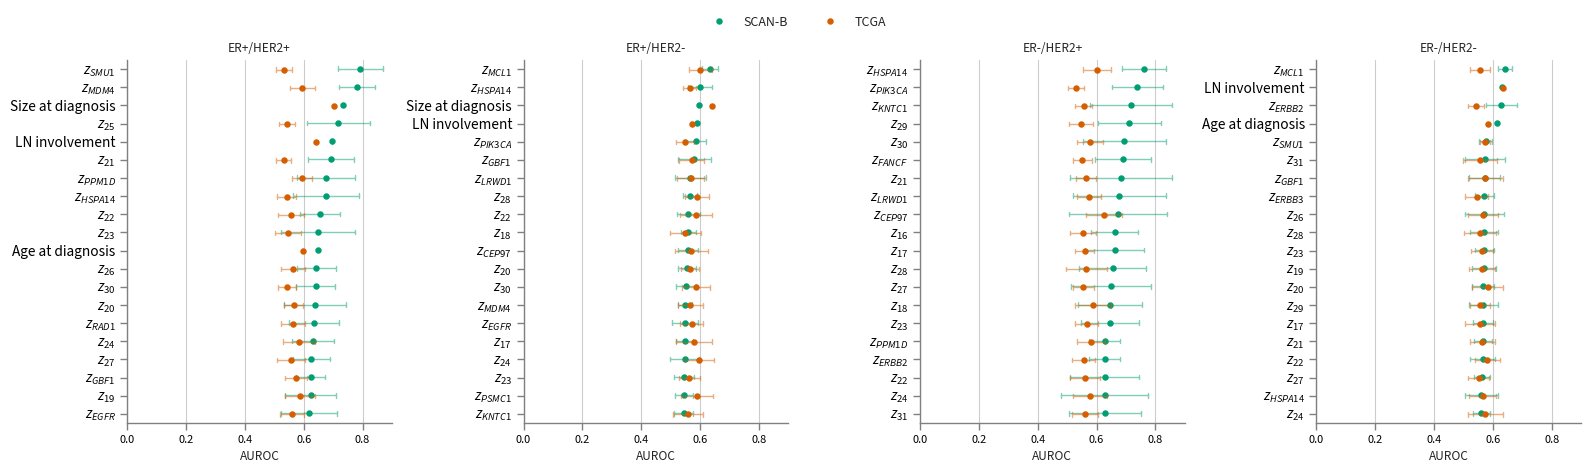

In [55]:
for metric in ["auroc"]:
    palette = sns.color_palette("colorblind")[2:]

    corrs_subtype_df_val = pd.DataFrame.from_dict(corrs_val).reset_index()

    corrs_subtype_df = pd.DataFrame.from_dict(corrs).reset_index()

    corrs_subtype_df_val["dataset"] = "TCGA"
    corrs_subtype_df["dataset"] = "SCAN-B"

    corrs_subtype_df = pd.concat(
        [corrs_subtype_df, corrs_subtype_df_val], axis=0
    ).reset_index()

    corrs_subtype_df["mean_auroc"] = (
        corrs_subtype_df.groupby(["dataset", "subtype", "feat"])
        .transform("mean")["auroc"]
        .astype(float)
    )

    corrs_subtype_df["feat"] = corrs_subtype_df["feat"].apply(lambda x: x.split("_"))
    corrs_subtype_df["feat"] = corrs_subtype_df["feat"].apply(
        lambda x: f"$z_{{{x[1]}}}$" if x[0] == "z" else names_map[x[1]]
    )

    # Create a new empty DataFrame to store sorted entries
    sorted_corrs = []

    # Sort 'feat' within each subtype independently
    for subtype, df_sub in corrs_subtype_df.groupby("subtype"):
        # Compute mean correlation across datasets for ordering
        order = (
            df_sub.groupby(["feat"])[f"mean_{metric}"]
            .mean()
            .sort_values(ascending=False, key=abs)
            .index
        )

        # Convert feat to ordered categorical
        df_sub = df_sub.copy()
        df_sub["feat"] = pd.Categorical(df_sub["feat"], categories=order, ordered=True)

        sorted_corrs.append(df_sub)

    # Concatenate sorted chunks
    corrs_subtype_df = pd.concat(sorted_corrs, axis=0)

    print(corrs_subtype_df)

    # Store your subtypes
    subtypes = corrs_subtype_df["subtype"].unique()

    # Set color palette
    palette = sns.color_palette("colorblind")[2:]

    # Create subplots with one axis per subtype
    fig, axes = plt.subplots(
        1, len(subtypes), figsize=(4 * len(subtypes), 4.5), sharex=True, sharey=False
    )

    if len(subtypes) == 1:
        axes = [axes]  # Make iterable if only one axis

    for ax, subtype in zip(axes, subtypes):
        df_sub = corrs_subtype_df[corrs_subtype_df["subtype"] == subtype].copy()

        # Get ordering for this facet
        # order = (
        #     df_sub.groupby("feat")[metric]
        #     .mean()
        #     .sort_values(ascending=False, key=abs)
        #     .head(20)
        #     .index
        # )
        # df_sub["feat"] = pd.Categorical(df_sub["feat"], categories=order, ordered=True)
        df_sub = df_sub.sort_values(
            by=["dataset", f"mean_{metric.split('_')[-1]}"],
            key=lambda x: abs(x) if x.dtypes == "float64" else x,
            ascending=[True, False],
        )

        # Plot each dataset
        sns.pointplot(
            data=df_sub,
            x=metric,
            y="feat",
            hue="dataset",
            dodge=True,
            errorbar=("sd", 1),
            capsize=0.25,
            ax=ax,
            linestyle="",
            palette=palette,
            legend=True,
            markersize=3,
            err_kws={"linewidth": 1, "alpha": 0.5},
        )

        ax.set_title(f"{subtype}")
        ax.set_xlabel(
            {
                "spearmanr": "Spearman correlation",
                "abs_spearmanr": "Abs. Spearman correlation",
                "pearsonr": "Pearson correlation",
                "abs_pearsonr": "Abs. Pearson correlation",
                "auroc": "AUROC",
            }.get(metric, metric)
        )
        ax.axvline(0, color="grey", lw=0.5)
        ax.set_xlim(0, 0.9)
        ax.grid(True, axis="x")
        ax.set_ylabel("")

        ax.set_ylim(19.5, -0.5)
        ax.tick_params(axis="y", labelsize=11)
        sns.despine(ax=ax)

    # Remove legends from individual axes
    for ax in axes:
        ax.legend_.remove()

    # Create a global legend from the first plot
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc="lower center",  # or 'upper center', 'right', etc.
        ncol=len(labels),  # horizontal layout
        frameon=False,
        fontsize=10,
        bbox_to_anchor=(0.5, 0.97),  # (x, y) position relative to figure
    )

    # if ax != axes[0]:
    # ax.set_yticklabels([])  # Only show y labels on first facet

    plt.tight_layout()
    plt.savefig(
        f"./figures/scanb/{metric}_assocs_subtype_{rep_type}.svg",
        bbox_inches="tight",
    )
    plt.savefig(
        f"./figures/scanb/{metric}_assocs_subtype_{rep_type}.png",
        bbox_inches="tight",
        dpi=600,
    )

### 5.2.4 Representation correlation matrix heatmap

In [ ]:
## SCATTER PLOT FEATURES
from functools import partial


def rep_renamer(x, constraints, prefix="z"):
    dim = int(x.split("_")[1])
    if dim < len(constraints):
        return f"{prefix}_{constraints[dim]}"
    else:
        return x


rep_type = "icovae_MCL1_16"
target = "BCFi"
experiment = "tcga"
model_type = "CoxPH"


res_root = f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/{target}/{experiment}/pico"
ext = "_AGE_5"

model_path = f"{res_root}/{model_type}_{rep_type + ext}"

names_map = {
    "AGE": "Age at diagnosis",
    "ER": "ER status",
    "HER2": "HER2 status",
    "LN": "LN involvement",
    "SIZE": "Size at diagnosis",
}


corrs = []
corrs_val = []
for seed in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    # LOAD ARGUMENTS
    with open(f"{model_path}/args_best_s{seed}.txt", "r") as f:
        args = json.load(f)

    print(args)

    constraints = args["constraints"]
    n_constraints = len(constraints)
    confounders = args["confounders"]
    strata = args["strata"]
    if confounders is None:
        n_confounders = 0
    else:
        n_confounders = len(confounders)

    # Load predictions
    test_z = pd.read_csv(f"{model_path}/z_pred_test_s{seed}.csv")
    train_z = pd.read_csv(f"{model_path}/z_pred_train_s{seed}.csv")

    # Rename test df
    test_z_rep_z = test_z.iloc[:, test_z.columns.str.startswith("z")]
    test_z_rep_c = test_z.iloc[:, test_z.columns.str.startswith("c")]
    test_z_rep_z = test_z_rep_z.rename(
        mapper=partial(rep_renamer, constraints=constraints, prefix="z"), axis=1
    )
    test_z_rep_c = test_z_rep_c.rename(
        mapper=partial(rep_renamer, constraints=confounders, prefix="c"), axis=1
    )

    test_z_rep = pd.concat([test_z_rep_z, test_z_rep_c], axis=1)

    # Rename train df
    train_z_rep_z = train_z.iloc[:, train_z.columns.str.startswith("z")]
    train_z_rep_c = train_z.iloc[:, train_z.columns.str.startswith("c")]
    train_z_rep_z = train_z_rep_z.rename(
        mapper=partial(rep_renamer, constraints=constraints, prefix="z"), axis=1
    )
    train_z_rep_c = train_z_rep_c.rename(
        mapper=partial(rep_renamer, constraints=confounders, prefix="c"), axis=1
    )

    train_z_rep = pd.concat([train_z_rep_z, train_z_rep_c], axis=1)

    feat_top_corr = pd.DataFrame(train_z_rep.corr(method="spearman"))
    feat_top_corr["seed"] = seed
    corrs.append(feat_top_corr)

    feat_top_corr_val = pd.DataFrame(test_z_rep.corr(method="spearman"))
    feat_top_corr_val["seed"] = seed
    corrs_val.append(feat_top_corr_val)

# corrs = pd.DataFrame(corrs)
# corrs_val = pd.DataFrame(corrs_val)

# r, p = pearsonr(x[feat_1], x[feat_2])
# print(f"{p*len(x.columns):.3e}")

# f, ax = plt.subplots(1,1, figsize=(2,2))
# sns.scatterplot(data=x, x=feat_1, y=feat_2, hue=hue, ax=ax, palette="Set2")
# sns.despine(ax=ax)
# ax.text(s=f"$r_{{p}} = {r:.3f}, p = {p*len(x.columns):.3f}$", x=0.1, y=1.0, transform=ax.transAxes, size=8)

# feat_1_split = feat_1.split("_")
# if feat_1_split[0] == "z":
#     ax.set_xlabel(rf"$z_{{{feat_1_split[1]}}}$")
# else:
#     ax.set_xlabel(names_map[feat_1])

# ax.set_ylabel(names_map[feat_2])


# plt.savefig(f"./ext_val_sammut/figures/corr_{feat_1}_{feat_2}.png", dpi=600, bbox_inches="tight")
# plt.savefig(f"./ext_val_sammut/figures/corr_{feat_1}_{feat_2}.svg", bbox_inches="tight")

{'target': 'BCFi', 'dataset': 'depmap_gdsc_scanb_tcga', 'enc': 'iCoVAE', 'reg': 'CoxPH', 'constraints': ['MCL1', 'PSMC1', 'FANCF', 'RAD1', 'PPM1D', 'SMU1', 'HSPA14', 'GBF1', 'MDM4', 'KNTC1', 'LRWD1', 'CEP97', 'ERBB2', 'ERBB3', 'EGFR', 'PIK3CA'], 'confounders': ['AGE', 'ER', 'HER2', 'LN', 'SIZE'], 'duration_event': ['MONTHS', 'STATUS'], 'strata': ['ER'], 'seed': 10, 'data_dir': './data', 'norm': False, 'lindec': False, 'filt': 'uni_var', 'experiment': 'tcga', 'cuda': False, 'norep': False, 'newstudy': False, 'enc_path': '/home/dk538/rds/hpc-work/graphdep/data/outputs/depmap_gdsc_scanb_tcga/BCFi/tcga/icovae_MCL1_16', 'test_samples': ['TCGA-3C-AALI', 'TCGA-3C-AALJ', 'TCGA-3C-AALK', 'TCGA-4H-AAAK', 'TCGA-5T-A9QA', 'TCGA-A1-A0SB', 'TCGA-A1-A0SD', 'TCGA-A1-A0SE', 'TCGA-A1-A0SF', 'TCGA-A1-A0SG', 'TCGA-A1-A0SH', 'TCGA-A1-A0SI', 'TCGA-A1-A0SJ', 'TCGA-A1-A0SK', 'TCGA-A1-A0SM', 'TCGA-A1-A0SN', 'TCGA-A1-A0SO', 'TCGA-A1-A0SQ', 'TCGA-A2-A04N', 'TCGA-A2-A04P', 'TCGA-A2-A04T', 'TCGA-A2-A04U', 'TCGA-A2

/home/dk538/.conda/envs/slurm-torch-2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/dk538/.conda/envs/slurm-torch-2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


$z_{MCL1}$     -0.135719
$z_{PSMC1}$    -0.304178
$z_{FANCF}$    -0.058397
$z_{RAD1}$     -0.059648
$z_{PPM1D}$    -0.235726
$z_{SMU1}$     -0.093431
$z_{HSPA14}$    0.035958
$z_{GBF1}$     -0.187595
$z_{MDM4}$     -0.208867
$z_{KNTC1}$    -0.073939
$z_{LRWD1}$    -0.267236
$z_{CEP97}$    -0.075642
$z_{ERBB2}$    -0.298846
$z_{ERBB3}$    -0.225964
$z_{EGFR}$     -0.005739
$z_{PIK3CA}$   -0.344303
dtype: float64
$z_{MCL1}$      0.280689
$z_{PSMC1}$     0.010147
$z_{FANCF}$     0.443592
$z_{RAD1}$      0.414427
$z_{PPM1D}$     0.045823
$z_{SMU1}$      0.379365
$z_{HSPA14}$    0.184866
$z_{GBF1}$      0.024054
$z_{MDM4}$      0.089603
$z_{KNTC1}$     0.215429
$z_{LRWD1}$     0.000927
$z_{CEP97}$     0.083968
$z_{ERBB2}$    -0.017965
$z_{ERBB3}$    -0.008654
$z_{EGFR}$      0.418907
$z_{PIK3CA}$   -0.002399
dtype: float64


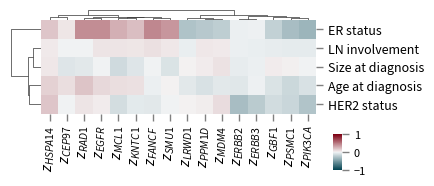

In [24]:
# Correlation of rep with all features, including expression

## REPRESENTATION CORRELATION WITH OTHER FEATURES
val = True

if val:
    corrs_df = (
        pd.concat(corrs_val, axis=0).reset_index().groupby("index").mean().reset_index()
    )
else:
    corrs_df = (
        pd.concat(corrs, axis=0).reset_index().groupby("index").mean().reset_index()
    )

pal = sns.color_palette("colorblind")


# row_colors = corrs_df["index"].apply(lambda x: feat_labeller(x))
# row_colors.index = corrs_df["index"]
# row_colors = row_colors.rename(lambda x: x.split("_"))
# row_colors = row_colors.rename(lambda x: f"$z_{{{x[1]}}}$" if len(x) > 1 else names_map[x[0]])
# print(row_colors)

corrs_df = corrs_df.set_index("index")

col_plot = [
    not col.split("_")[1].isdigit() and (col.split("_")[0] == "z")
    if (len(col.split("_")) > 1)
    else False
    for col in corrs_df.columns
]

corrs_df = corrs_df.loc[~corrs_df.index.str.startswith("z"), col_plot].reset_index()

corrs_df["index"] = corrs_df["index"].apply(lambda x: x.split("_"))
corrs_df["index"] = corrs_df["index"].apply(
    lambda x: f"$z_{{{x[1]}}}$" if (x[0] == "z") else names_map[x[1]]
)

split_str = "_"

corrs_df = corrs_df.set_index("index").rename(
    lambda x: rf"$z_{{{x.split(split_str)[1]}}}$", axis=1
)

print(np.min(corrs_df))
print(np.max(corrs_df))

# Drop columns with all low values
corrs_df = corrs_df.T
for col in corrs_df:
    # If all value in column less than 0.2 then drop
    if (corrs_df[col].abs() < 0.0).all():
        corrs_df = corrs_df.drop(col, axis=1)

fig_width = len(corrs_df.columns)

g = sns.clustermap(
    corrs_df.T,
    yticklabels=True,
    xticklabels=True,
    figsize=(4.5, fig_width / 2.8),
    method="complete",
    cmap=sns.diverging_palette(220, 10, s=100, l=25, as_cmap=True),
    vmin=-1,
    vmax=1,
    center=0,
    cbar_pos=(0.75, 0.02, 0.02, 0.2),
    dendrogram_ratio=0.1,
)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=12)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=10)
g.ax_heatmap.set_ylabel("")
g.ax_heatmap.set_xlabel("")

plt.savefig(
    f"./figures/scanb/feat_corr_hm_{rep_type}_{'val' if val else 'train'}.png",
    bbox_inches="tight",
    dpi=600,
)
plt.savefig(
    f"./figures/scanb/feat_corr_hm_{rep_type}_{'val' if val else 'train'}.svg",
    bbox_inches="tight",
)

In [25]:
# Print results for reporting in paper
corrs_df

index,Age at diagnosis,ER status,HER2 status,LN involvement,Size at diagnosis
$z_{MCL1}$,0.085361,0.280689,-0.124806,0.059193,-0.135719
$z_{PSMC1}$,-0.152930,-0.304178,-0.158414,-0.039966,0.010147
$z_{FANCF}$,-0.021552,0.443592,-0.058397,0.072378,-0.000226
$z_{RAD1}$,0.190845,0.414427,0.057945,-0.006344,-0.059648
$z_{PPM1D}$,-0.099470,-0.235726,0.018556,0.045823,0.024459
$z_{SMU1}$,0.007367,0.379365,-0.002294,0.043795,-0.093431
$z_{HSPA14}$,0.139321,0.179727,0.184866,0.035958,0.046312
$z_{GBF1}$,-0.091545,-0.187595,-0.127372,-0.035490,0.024054
$z_{MDM4}$,-0.060644,-0.208867,0.089603,0.032355,0.063718
$z_{KNTC1}$,0.076626,0.215429,-0.053468,0.052497,-0.073939


       index    z_MCL1   z_PSMC1   z_FANCF    z_RAD1   z_PPM1D    z_SMU1  \
0    z_CEP97  0.143020 -0.085870 -0.047509  0.246017  0.048179  0.080761   
1     z_EGFR  0.314846 -0.025052  0.043614  0.174630 -0.110270  0.116933   
2    z_ERBB2 -0.025806  0.191335  0.045074  0.007506 -0.198563  0.064030   
3    z_ERBB3  0.035265  0.094622  0.076102 -0.045863  0.001637 -0.053557   
4    z_FANCF  0.098316 -0.145986  1.000000 -0.001551 -0.132559 -0.025780   
5     z_GBF1  0.076135  0.255107  0.099204 -0.313679  0.213900 -0.025665   
6   z_HSPA14 -0.069452 -0.034303 -0.119136  0.162725  0.097136 -0.079599   
7    z_KNTC1  0.346311  0.003806  0.071600  0.016755  0.103747  0.127069   
8    z_LRWD1  0.048614 -0.005855  0.074691 -0.107212 -0.149939  0.004172   
9     z_MCL1  1.000000  0.015118  0.098316 -0.014516  0.111188  0.180990   
10    z_MDM4 -0.025381  0.026412 -0.219891 -0.234072  0.470207 -0.277875   
11  z_PIK3CA  0.039270  0.191248  0.007038 -0.269322  0.134532 -0.152192   
12   z_PPM1D

/home/dk538/.conda/envs/slurm-torch-2/lib/python3.9/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


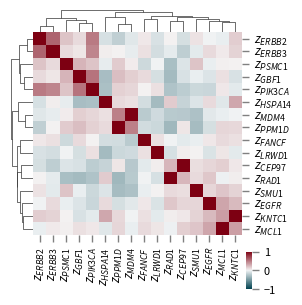

In [28]:
## REPRESENTATION CORRELATION WITH ITSELF
val = False
if val:
    corrs_df = (
        pd.concat(corrs_val, axis=0).reset_index().groupby("index").mean().reset_index()
    )
else:
    corrs_df = (
        pd.concat(corrs, axis=0).reset_index().groupby("index").mean().reset_index()
    )

corrs_df = corrs_df.set_index("index")

col_plot = [
    not col.split("_")[1].isdigit() if (col.split("_")[0] == "z") else False
    for col in corrs_df.columns
]

row_plot = [
    not row.split("_")[1].isdigit() if (row.split("_")[0] == "z") else False
    for row in corrs_df.index
]

corrs_df = corrs_df.loc[row_plot, col_plot].reset_index()

print(corrs_df)

corrs_df["index"] = corrs_df["index"].apply(lambda x: x.split("_"))
corrs_df["index"] = corrs_df["index"].apply(
    lambda x: f"$z_{{{x[1]}}}$" if len(x) > 1 else names_map[x[0]]
)

split_str = "_"

corrs_df = corrs_df.set_index("index").rename(
    lambda x: rf"$z_{{{x.split(split_str)[1]}}}$", axis=1
)

g = sns.clustermap(
    corrs_df,
    square=True,
    yticklabels=True,
    xticklabels=True,
    figsize=(3.25, 3),
    method="complete",
    cmap=sns.diverging_palette(220, 10, s=100, l=25, as_cmap=True),
    cbar_pos=(0.77, 0.02, 0.02, 0.125),
    dendrogram_ratio=0.1,
    center=0.0,
    vmax=1,
    vmin=-1,
)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=10)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=10)
g.ax_heatmap.set_ylabel("")

plt.savefig(
    f"./figures/scanb/rep_corr_hm_{rep_type}_{'val' if val else 'train'}.png",
    bbox_inches="tight",
    dpi=600,
)
plt.savefig(
    f"./figures/scanb/rep_corr_hm_{rep_type}_{'val' if val else 'train'}.svg",
    bbox_inches="tight",
)

## 5.4 Representation UMAPs

{'target': 'BCFi', 'dataset': 'depmap_gdsc_scanb_tcga', 'enc': 'iCoVAE', 'reg': 'CoxPH', 'constraints': ['MCL1', 'PSMC1', 'FANCF', 'RAD1', 'PPM1D', 'SMU1', 'HSPA14', 'GBF1', 'MDM4', 'KNTC1', 'LRWD1', 'CEP97', 'ERBB2', 'ERBB3', 'EGFR', 'PIK3CA'], 'confounders': ['AGE', 'ER', 'HER2', 'LN', 'SIZE'], 'duration_event': ['MONTHS', 'STATUS'], 'strata': ['ER'], 'seed': 10, 'data_dir': './data', 'norm': False, 'lindec': False, 'filt': 'uni_var', 'experiment': 'tcga', 'cuda': False, 'norep': False, 'newstudy': False, 'enc_path': '/home/dk538/rds/hpc-work/graphdep/data/outputs/depmap_gdsc_scanb_tcga/BCFi/tcga/icovae_MCL1_16', 'test_samples': ['TCGA-3C-AALI', 'TCGA-3C-AALJ', 'TCGA-3C-AALK', 'TCGA-4H-AAAK', 'TCGA-5T-A9QA', 'TCGA-A1-A0SB', 'TCGA-A1-A0SD', 'TCGA-A1-A0SE', 'TCGA-A1-A0SF', 'TCGA-A1-A0SG', 'TCGA-A1-A0SH', 'TCGA-A1-A0SI', 'TCGA-A1-A0SJ', 'TCGA-A1-A0SK', 'TCGA-A1-A0SM', 'TCGA-A1-A0SN', 'TCGA-A1-A0SO', 'TCGA-A1-A0SQ', 'TCGA-A2-A04N', 'TCGA-A2-A04P', 'TCGA-A2-A04T', 'TCGA-A2-A04U', 'TCGA-A2

/home/dk538/.conda/envs/slurm-torch-2/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


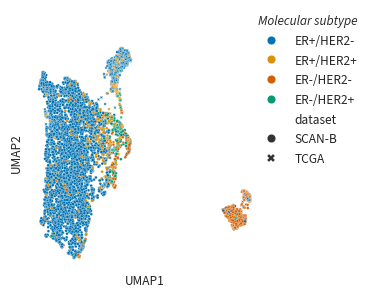

In [ ]:
from umap import UMAP
from sklearn.preprocessing import StandardScaler
import json

## SCATTER PLOT FEATURES
from functools import partial


def rep_renamer(x, constraints, prefix="z"):
    dim = int(x.split("_")[1])
    if dim < len(constraints):
        return f"{prefix}_{constraints[dim]}"
    else:
        return x


rep_type = "icovae_MCL1_16"
# rep_type = "vae"
target = "BCFi"
experiment = "tcga"
model_type = "CoxPH"


def plot_umap(x, hue, n_neighbors=20, seed=10):
    pal = sns.color_palette("colorblind")

    # merge dfs
    if hue in ["TP53", "PIK3CA", "PTEN"]:
        palette = {1.0: pal[0], 0.0: pal[1], "NA": "lightgrey"}
    elif hue.startswith(("z_", "GGI", "STAT1", "All.TMB", "Coding.TMB", "c_GGI")):
        palette = sns.color_palette("Blues", as_cmap=True)
    elif hue == "PAM50":
        palette = {
            "Basal": pal[0],
            "LumA": pal[1],
            "LumB": pal[2],
            "Her2": pal[3],
            "Normal": pal[4],
            "NA": "lightgrey",
        }
    elif hue == "c_MolType":
        palette = {
            "ER+/HER2-": pal[0],
            "ER+/HER2+": pal[1],
            "ER-/HER2+": pal[2],
            "ER-/HER2-": pal[3],
            "NA": "lightgrey",
        }
    else:
        palette = pal

    n_samp = len(x)
    print(f"n: {n_samp}")

    fig, ax = plt.subplots(1, 1, figsize=(3, 3))

    surv_rep_zs = x.loc[:, x.columns.str.startswith("z_")]

    # standardize z dimensions for t-SNE
    scaler = StandardScaler()
    surv_rep_zs = scaler.fit_transform(surv_rep_zs)

    results_tsne_df = UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=0.01,
        random_state=seed,
    ).fit_transform(surv_rep_zs)

    results_tsne_df = pd.DataFrame(results_tsne_df).rename(
        {0: "UMAP1", 1: "UMAP2"}, axis=1
    )
    results_tsne_df.index = x.index

    results_tsne_df = pd.merge(results_tsne_df, x, left_index=True, right_index=True)

    sns.scatterplot(
        data=results_tsne_df,
        x="UMAP1",
        y="UMAP2",
        hue=hue,
        style="dataset",
        palette=palette,
        ax=ax,
        s=4,
    )
    plt.xticks([], [])
    plt.yticks([], [])

    sns.despine(bottom=True, top=True, left=True, right=True)

    h, l = ax.get_legend_handles_labels()
    # h, l = zip(*sorted(zip(h, l), key=lambda t: t[1]))
    h[5].text = "Dataset"
    h = h[1:]
    l = l[1:]

    for handle in h:
        handle.set_markersize(6.0)
    hue_map = {
        "c_PAM50": "PAM50 subtype",
        "c_NCN.PAM50": "PAM50 subtype",
        "c_ClinGroup": "Clinical subgroup",
        "TP53": "TP53 mutation status",
        "PIK3CA": "PIK3CA mutation status",
        "c_GGI.ssgsea.notnorm": "GGI score",
        "c_ER.status": "ER status",
        "c_HER2.status": "HER2 status",
        "c_Histology": "Histology",
        "c_MolType": "Molecular subtype",
        "dataset": "Dataset",
    }
    ax.legend(
        handles=h,
        labels=l,
        title=hue_map[hue],
        fontsize="medium",
        ncol=1,
        frameon=False,
        bbox_to_anchor=(1.20, 1.15),
        loc="upper center",
        title_fontproperties={"style": "italic", "size": "medium"},
    )

    # plt.legend('',frameon=False)
    plt.savefig(
        f"./figures/scanb/UMAP_{hue}_n{n_neighbors}_s{seed}.png",
        bbox_inches="tight",
        dpi=600,
    )
    plt.savefig(
        f"./figures/scanb/UMAP_{hue}_n{n_neighbors}_s{seed}.svg", bbox_inches="tight"
    )


res_root = f"{wd_path}/data/outputs/depmap_gdsc_scanb_tcga/{target}/{experiment}/pico"
ext = "_AGE_5"

model_path = f"{res_root}/{model_type}_{rep_type + ext}"

corrs = []
corrs_val = []
for seed in [10]:
    # LOAD ARGUMENTS
    with open(f"{model_path}/args_best_s{seed}.txt", "r") as f:
        args = json.load(f)

    print(args)

    constraints = args["constraints"]
    n_constraints = len(constraints)
    confounders = args["confounders"]
    if confounders is None:
        n_confounders = 0
    else:
        n_confounders = len(confounders)

    # Load predictions
    test_z = pd.read_csv(f"{model_path}/z_pred_test_s{seed}.csv")
    train_z = pd.read_csv(f"{model_path}/z_pred_train_s{seed}.csv")

    # Rename test df
    test_z_rep_z = test_z.iloc[:, test_z.columns.str.startswith("z")]
    test_z_rep_c = test_z.iloc[:, test_z.columns.str.startswith("c")]
    test_z_rep_z = test_z_rep_z.rename(
        mapper=partial(rep_renamer, constraints=constraints, prefix="z"), axis=1
    )
    test_z_rep_c = test_z_rep_c.rename(
        mapper=partial(rep_renamer, constraints=confounders, prefix="c"), axis=1
    )

    test_z_rep = pd.concat([test_z_rep_z, test_z_rep_c], axis=1)

    # Rename train df
    train_z_rep_z = train_z.iloc[:, train_z.columns.str.startswith("z")]
    train_z_rep_c = train_z.iloc[:, train_z.columns.str.startswith("c")]
    train_z_rep_z = train_z_rep_z.rename(
        mapper=partial(rep_renamer, constraints=constraints, prefix="z"), axis=1
    )
    train_z_rep_c = train_z_rep_c.rename(
        mapper=partial(rep_renamer, constraints=confounders, prefix="c"), axis=1
    )

    train_z_rep = pd.concat([train_z_rep_z, train_z_rep_c], axis=1)

    # Concatenate train and test
    test_z_rep["dataset"] = "TCGA"
    train_z_rep["dataset"] = "SCAN-B"
    train_z_rep = pd.concat([train_z_rep, test_z_rep], axis=0).reset_index()

    train_z_rep["c_ER"] = train_z_rep["c_ER"] > 0
    train_z_rep["c_HER2"] = train_z_rep["c_HER2"] > 0
    train_z_rep["c_MolType"] = train_z_rep["c_ER"].astype(str) + train_z_rep[
        "c_HER2"
    ].astype(str)

    moltype_map = {
        "TrueFalse": "ER+/HER2-",
        "TrueTrue": "ER+/HER2+",
        "FalseTrue": "ER-/HER2+",
        "FalseFalse": "ER-/HER2-",
    }

    train_z_rep["c_MolType"] = train_z_rep["c_MolType"].apply(lambda x: moltype_map[x])

    plot_umap(train_z_rep, hue="c_MolType", n_neighbors=15, seed=seed)